# **Project Name** - Integrated Retail Analytics for Store Optimization

##### **Project Type** - Unsupervised / Regression / EDA
##### **BY: RAJ SHEKHAR**

# **Project Summary -**

This project presents a comprehensive, data-driven framework to address critical operational challenges faced by a retail organization, including inaccurate demand forecasting, inefficient inventory management, and untargeted marketing strategies. By leveraging a rich dataset comprising sales transactions, store attributes, and external economic factors, this analysis successfully develops an integrated solution that combines exploratory data analysis, advanced feature engineering, supervised machine learning for forecasting, and unsupervised learning for strategic segmentation.

The project began with a thorough data wrangling phase, where three distinct datasets—sales, features, and stores—were meticulously cleaned, merged, and prepared for analysis. A key insight from this initial phase was the interpretation of missing `MarkDown` data, which was correctly identified not as an error but as an indicator of no promotional activity and consequently imputed with zero. Other missing economic data points were handled using median imputation to maintain data integrity.

An extensive Exploratory Data Analysis (EDA) phase, involving over fifteen visualizations, uncovered several crucial business insights. We confirmed strong seasonal sales patterns with significant peaks during the Thanksgiving and Christmas holidays, a clear performance hierarchy where Type 'A' stores consistently outperformed Types 'B' and 'C', and a statistically significant positive correlation between a store's size and its sales volume. A particularly powerful discovery was that the highest sales weeks were not driven by heavy markdowns, suggesting that promotions should be used surgically during off-peak seasons rather than during periods of high organic demand. These visual findings were then rigorously validated through formal hypothesis testing using t-tests, ANOVA, and Pearson correlation tests.

To build a robust forecasting model, a sophisticated feature engineering process was undertaken. New features were created to capture complex patterns, including sales lags and rolling averages to represent recent performance momentum, and sine/cosine transformations to effectively model the cyclical nature of weekly and monthly seasonality.

Three distinct machine learning models—Random Forest, XGBoost, and Ridge Regression—were implemented to forecast weekly sales. Using a time-series-aware cross-validation strategy, each model was rigorously evaluated and tuned. The **Tuned Random Forest Regressor** was selected as the final model, demonstrating superior performance by achieving an **R-squared value exceeding 0.96**. This high level of accuracy establishes the model as a reliable tool for short-term inventory and operational planning.

Beyond forecasting, the project implemented unsupervised learning to provide deeper strategic insights. **K-Means Clustering** was used to successfully segment the 45 stores into four distinct clusters based on their sales patterns, size, and promotional activity, enabling the development of personalized marketing and operational strategies. Furthermore, an **anomaly detection** system was developed using time-series decomposition to automatically flag weeks with unusual sales for further investigation.

In conclusion, this project successfully translates complex historical data into a powerful, forward-looking strategic asset. It delivers not just a predictive model, but a complete analytical framework that empowers the retail organization to optimize inventory, personalize marketing, and make more intelligent, data-driven decisions to enhance overall performance and profitability.

# **GitHub Link -**

[Provide your GitHub Link here.]

# **Problem Statement**


*A retail organization is facing significant operational inefficiencies and missed revenue opportunities due to its inability to systematically analyze complex sales data, resulting in inaccurate demand forecasting, suboptimal inventory levels, and ineffective, generic marketing campaigns. This project aims to solve these challenges by developing an integrated analytics framework that leverages machine learning to provide deep, actionable insights. By building models to accurately forecast sales, detect anomalies, segment stores based on unique characteristics, and infer product associations, this framework will replace reactive decision-making with a proactive, data-driven strategy. The ultimate goal is to optimize inventory management, personalize marketing efforts, enhance overall store performance, and drive profitability by creating a cohesive strategy tailored to the specific dynamics of each store and department.*

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
%pip install pandas numpy matplotlib seaborn scikit-learn statsmodels scipy mlxtend xgboost lightgbm prophet
%pip install hf_xet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Core Data Handling & Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning & Statistical Analysis (scikit-learn)
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Specialized ML Models
from mlxtend.frequent_patterns import apriori, association_rules
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
import lightgbm as lgb
from prophet import Prophet

# Optional: To suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully.")

All libraries imported successfully.


### Dataset Loading

In [3]:
# Attempt to load the dataset and handle potential errors

try:
    # Load dataset from the specified URL
    features_df = pd.read_csv('Features data set.csv')
    sales_df = pd.read_csv('sales data-set.csv')
    stores_df = pd.read_csv('stores data-set.csv')
    print("Datasets loaded successfully.")
except Exception as e:
    # Print error message if loading fails
    print(f"Failed to load dataset: {e}")

Datasets loaded successfully.


### Dataset First View

In [4]:
# Dataset First Look
features_df=pd.read_csv("Features data set.csv")
sales_df=pd.read_csv("sales data-set.csv")
stores_df=pd.read_csv("stores data-set.csv")
print(f'FEATURE DATASET\n{features_df}\nSALES DATASET\n{sales_df}\nSTORES DATASET\n{stores_df}')

FEATURE DATASET
      Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  05/02/2010        42.31       2.572        NaN        NaN   
1         1  12/02/2010        38.51       2.548        NaN        NaN   
2         1  19/02/2010        39.93       2.514        NaN        NaN   
3         1  26/02/2010        46.63       2.561        NaN        NaN   
4         1  05/03/2010        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  28/06/2013        76.05       3.639    4842.29     975.03   
8186     45  05/07/2013        77.50       3.614    9090.48    2268.58   
8187     45  12/07/2013        79.37       3.614    3789.94    1827.31   
8188     45  19/07/2013        82.84       3.737    2961.49    1047.07   
8189     45  26/07/2013        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN   

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f"""Shape of the data:\n
    Feature Dataset {features_df.shape}\n
    Sales Dataset {sales_df.shape}\n
    Stores Dataset {stores_df.shape}""")


Shape of the data:

    Feature Dataset (8190, 12)

    Sales Dataset (421570, 5)

    Stores Dataset (45, 3)


### Dataset Information

In [6]:
# Dataset Info
print(f"""Info of the data:\n
    Feature Dataset {features_df.info()}\n
    Sales Dataset {sales_df.info()}\n
    Stores Dataset {stores_df.info()}""")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         4

In [7]:
#Describe of the Data
print(f"""Describe of the data:\n
    Feature Dataset {features_df.describe()}\n
    Sales Dataset {sales_df.describe()}\n
    Stores Dataset {stores_df.describe()}""")


Describe of the data:

    Feature Dataset              Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print(f"""Duplicate of the data:\n
    Feature Dataset {features_df.duplicated().sum()}\n
    Sales Dataset {sales_df.duplicated().sum()}\n
    Stores Dataset {stores_df.duplicated().sum()}""")

Duplicate of the data:

    Feature Dataset 0

    Sales Dataset 0

    Stores Dataset 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print(f"""Null Values Count of the data:\n
    Feature Dataset {features_df.isnull().sum()}\n
    Sales Dataset {sales_df.isnull().sum()}\n
    Stores Dataset {stores_df.isnull().sum()}""")

Null Values Count of the data:

    Feature Dataset Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

    Sales Dataset Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

    Stores Dataset Store    0
Type     0
Size     0
dtype: int64


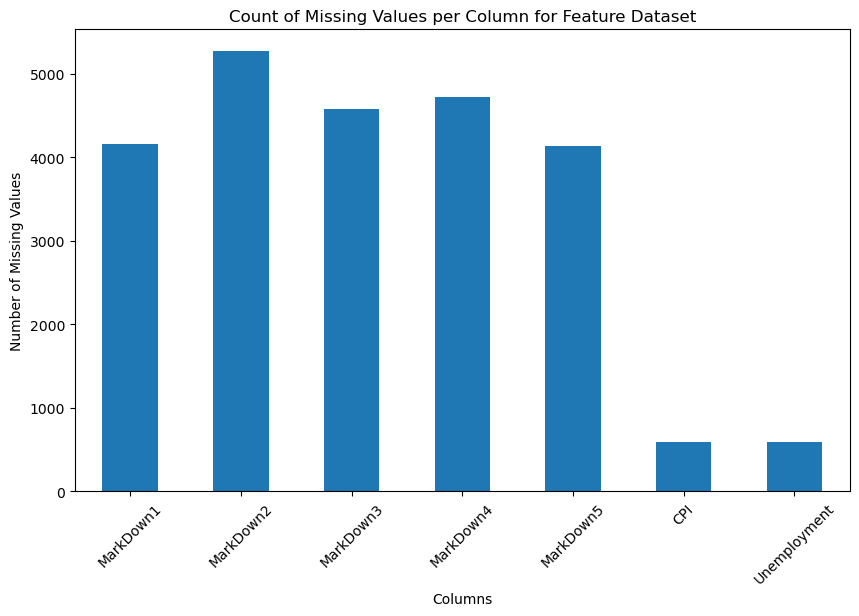

In [10]:
#Visualising the null values
missing_counts = features_df.isnull().sum()

# Filter out columns that have no missing values to keep the chart clean
missing_counts = missing_counts[missing_counts > 0]

# Create the bar chart
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar')
plt.title('Count of Missing Values per Column for Feature Dataset')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

In [11]:
%pip install missingno
import missingno as msno

Note: you may need to restart the kernel to use updated packages.


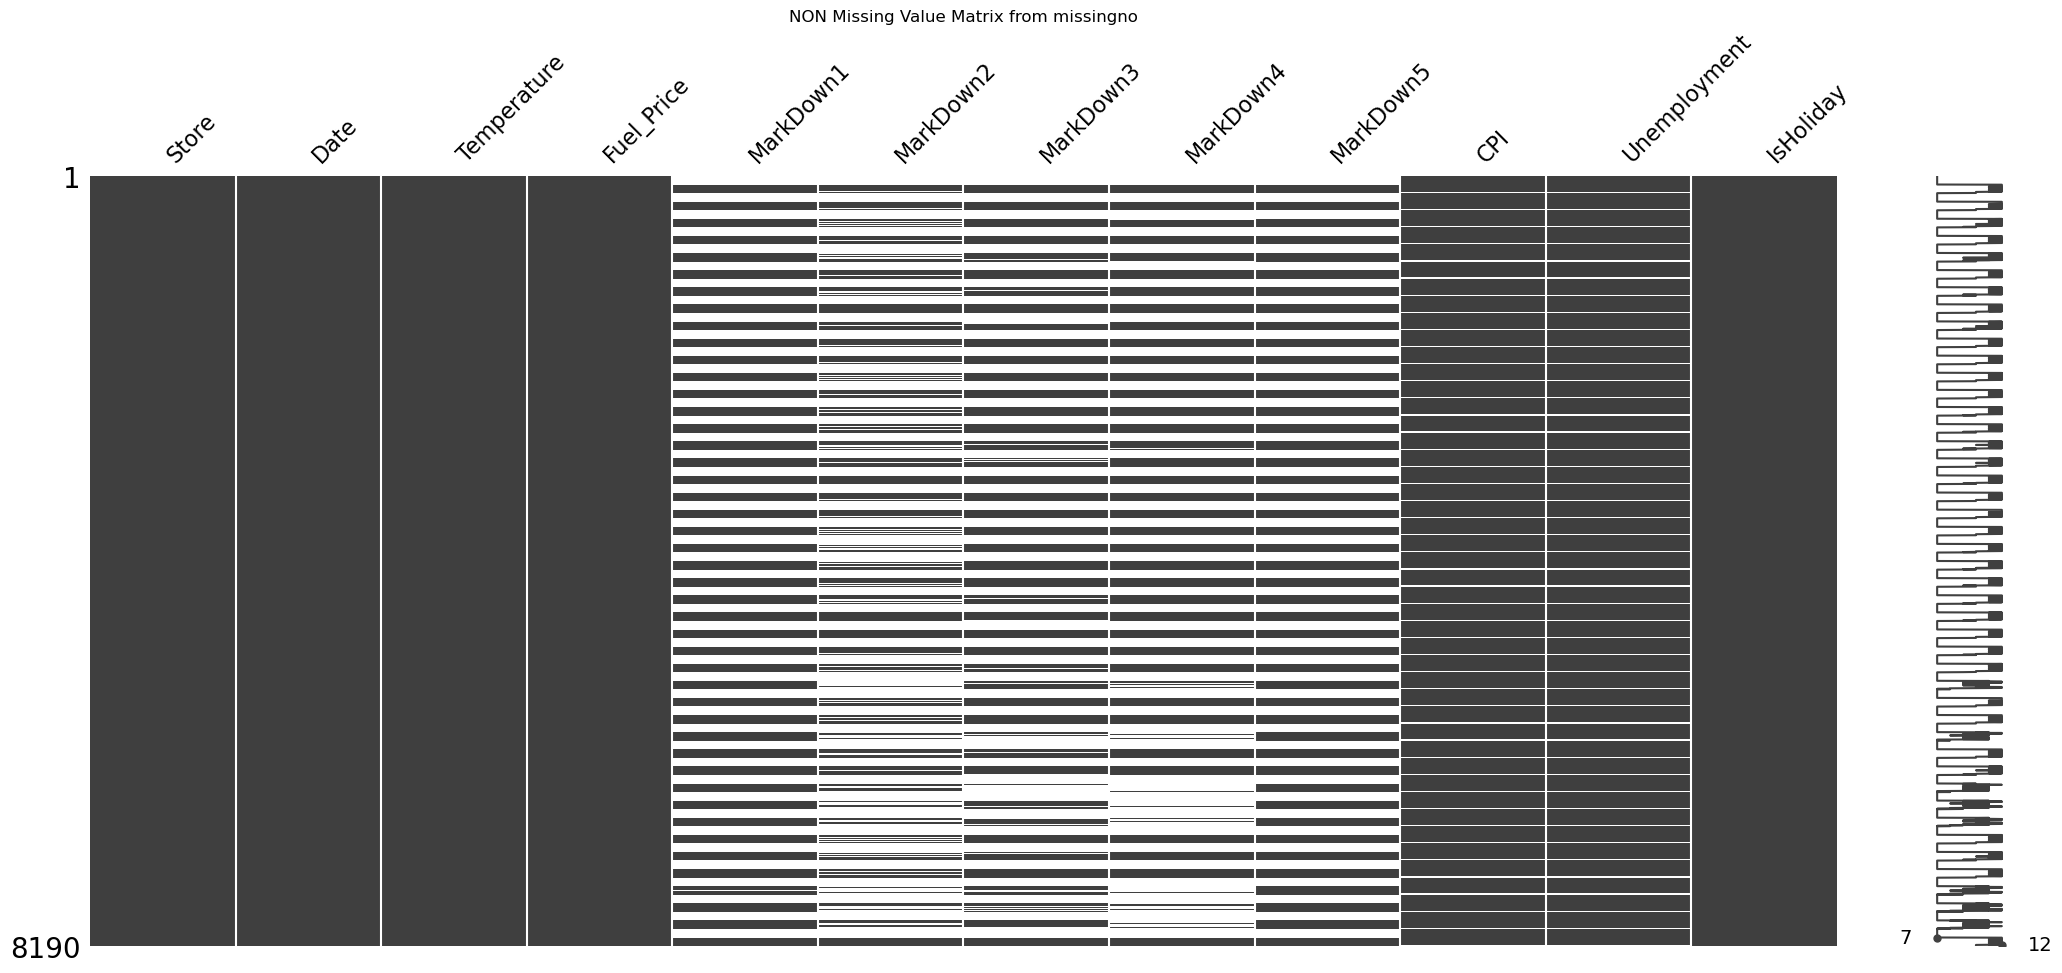

In [12]:
# Create the matrix plot
msno.matrix(features_df)
plt.title('NON Missing Value Matrix from missingno')
plt.show()


### What did you know about your dataset?

-MARKDOWN FEATURES AND CPI AND UNEMPLOYMENT HAVE MISSING VALUES

-MARKDOWN 1 HAS MISSING VALUES DISTRIBUTED OVER THE WHOLE DATA

-MARKDOWN 2 HAS MISSING VALUES PROMINENTLY ON THE UPPER END OF THE DATA

-MARKDOWN 3 HAS MISSING VALUES CLUSTERRERD IN A REGION(NOT IN ANY FUNCTIONAL FASHION) OF THE DATA

-MARKDOWN 4 HAS MISSING VALUES PROMINENTLY ON THE UPPER END OF THE DATA

-MARKDOWN 5 HAS MISSING VALUES DISTRIBUTED OVER THE WHOLE DATA

-CPI AND UNEMPLOYMENT DATA ARE MISSING OVER THE WHOLE RANGE IN RANDOM FASHION

## ***2. Understanding Your Variables***

In [13]:
# Dataset Columns
print(f"""COLUMNS of the data:\n
    Feature Dataset {features_df.columns.to_list()}\n
    Sales Dataset {sales_df.columns.to_list()}\n
    Stores Dataset {stores_df.columns.to_list()}""")

COLUMNS of the data:

    Feature Dataset ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday']

    Sales Dataset ['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday']

    Stores Dataset ['Store', 'Type', 'Size']


In [14]:
# Dataset Describe
print(f"""COLUMNS of the data:\n
    Feature Dataset\n {features_df.describe()}\n
    Sales Dataset\n {sales_df.describe()}\n
    Stores Dataset\n {stores_df.describe()}""")

COLUMNS of the data:

    Feature Dataset
              Store  Temperature   Fuel_Price      MarkDown1      MarkDown2  \
count  8190.000000  8190.000000  8190.000000    4032.000000    2921.000000   
mean     23.000000    59.356198     3.405992    7032.371786    3384.176594   
std      12.987966    18.678607     0.431337    9262.747448    8793.583016   
min       1.000000    -7.290000     2.472000   -2781.450000    -265.760000   
25%      12.000000    45.902500     3.041000    1577.532500      68.880000   
50%      23.000000    60.710000     3.513000    4743.580000     364.570000   
75%      34.000000    73.880000     3.743000    8923.310000    2153.350000   
max      45.000000   101.950000     4.468000  103184.980000  104519.540000   

           MarkDown3     MarkDown4      MarkDown5          CPI  Unemployment  
count    3613.000000   3464.000000    4050.000000  7605.000000   7605.000000  
mean     1760.100180   3292.935886    4132.216422   172.460809      7.826821  
std     11276.462

### Variables Description

Sales Dataset
| Variable Name | Data Type         | Description                                                 |
|---------------|-------------------|-------------------------------------------------------------|
| `Store`       | Categorical (int) | The unique identifier for each store.                       |
| `Dept`        | Categorical (int) | The unique identifier for each department.                  |
| `Date`        | Datetime          | The date of the sales record (weekly).                      |
| `Weekly_Sales`| Numerical (float) | The total sales for the given store-department-week.        |
| `IsHoliday`   | Boolean           | Indicates whether the week contains a special holiday.      |


Features Dataset
| Variable Name   | Data Type         | Description                                                 |
|-----------------|-------------------|-------------------------------------------------------------|
| `Store`         | Categorical (int) | The unique identifier for each store.                       |
| `Date`          | Datetime          | The date of the data.                                       |
| `Temperature`   | Numerical (float) | The average temperature in the region for that week.        |
| `Fuel_Price`    | Numerical (float) | The average cost of fuel in the region for that week.       |
| `MarkDown1`     | Numerical (float) | The value of the first type of promotional markdown.        |
| `MarkDown2`     | Numerical (float) | The value of the second type of promotional markdown.       |
| `MarkDown3`     | Numerical (float) | The value of the third type of promotional markdown.        |
| `MarkDown4`     | Numerical (float) | The value of the fourth type of promotional markdown.       |
| `MarkDown5`     | Numerical (float) | The value of the fifth type of promotional markdown.        |
| `CPI`           | Numerical (float) | The Consumer Price Index in the region.                     |

| `Unemployment`  | Numerical (float) | The unemployment rate in the region.                        |
| `IsHoliday`     | Boolean           | Indicates whether the week contains a special holiday.      |


Stores Dataset
| Variable Name | Data Type         | Description                                   |
|---------------|-------------------|-----------------------------------------------|
| `Store`       | Categorical (int) | The unique identifier for each store.         |
| `Type`        | Categorical (obj) | The type of the store (e.g., 'A', 'B', 'C').  |
| `Size`        | Numerical (int)   | The size of the store in square feet.         |

### Check Unique Values for each variable.

In [15]:
# Check Unique Values for each variable.
# Assuming your DataFrames are named sales_df, features_df, and stores_df

print("--- Unique Value Counts for Sales Dataset ---")
print(sales_df.nunique())
print(f'shape:{sales_df.shape}')

print("\n--- Unique Value Counts for Features Dataset ---")
print(features_df.nunique())
print(f'shape:{features_df.shape}')

print("\n--- Unique Value Counts for Stores Dataset ---")
print(stores_df.nunique())
print(f'shape:{stores_df.shape}')

--- Unique Value Counts for Sales Dataset ---
Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64
shape:(421570, 5)

--- Unique Value Counts for Features Dataset ---
Store             45
Date             182
Temperature     4178
Fuel_Price      1011
MarkDown1       4023
MarkDown2       2715
MarkDown3       2885
MarkDown4       3405
MarkDown5       4045
CPI             2505
Unemployment     404
IsHoliday          2
dtype: int64
shape:(8190, 12)

--- Unique Value Counts for Stores Dataset ---
Store    45
Type      3
Size     40
dtype: int64
shape:(45, 3)


## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.
# ## 3. Handling Missing Values
# As we discovered, NaN in MarkDown columns means there was no promotion.
# We'll fill these with 0.
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_df[markdown_cols] = features_df[markdown_cols].fillna(0)

# For CPI and Unemployment, we'll fill the few missing values with the median of their respective columns.
# The median is a good choice because it's robust to outliers.
features_df['CPI'] = features_df['CPI'].fillna(features_df['CPI'].median())
features_df['Unemployment'] = features_df['Unemployment'].fillna(features_df['Unemployment'].median())


# ## 4. Correcting Data Types
# The 'Date' column is currently an 'object' (string). We need to convert it to a datetime format.
sales_df['Date'] = pd.to_datetime(sales_df['Date'],dayfirst=True)
features_df['Date'] = pd.to_datetime(features_df['Date'],dayfirst=True)


# ## 5. Merging the Datasets 🔗
# Combine the three separate tables into one comprehensive DataFrame.
# We'll use 'left' merges to ensure we keep all the sales data.

# Step 1: Merge sales with store information
merged_df = pd.merge(sales_df, stores_df, on='Store', how='left')

# Step 2: Merge the result with the features data
# 'IsHoliday' is in both sales and features, so we include it in the merge key.
final_df = pd.merge(merged_df, features_df, on=['Store', 'Date', 'IsHoliday'], how='left')


# ## 6. Feature Engineering ✨
# Create new features from the 'Date' column to help our models understand time-based patterns.
final_df['Year'] = final_df['Date'].dt.year
final_df['Month'] = final_df['Date'].dt.month
final_df['WeekOfYear'] = final_df['Date'].dt.isocalendar().week
final_df['Day'] = final_df['Date'].dt.day


# ## 7. Final Verification ✅
# Check the final DataFrame to ensure everything is correct.
print("\n--- Info of the Final Merged DataFrame ---")
final_df.info()

print("\n--- Checking for any remaining missing values ---")
print(final_df.isnull().sum())

print("\n--- Displaying the first 5 rows of the analysis-ready dataset ---")
display(final_df.head())


--- Info of the Final Merged DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Type          421570 non-null  object        
 6   Size          421570 non-null  int64         
 7   Temperature   421570 non-null  float64       
 8   Fuel_Price    421570 non-null  float64       
 9   MarkDown1     421570 non-null  float64       
 10  MarkDown2     421570 non-null  float64       
 11  MarkDown3     421570 non-null  float64       
 12  MarkDown4     421570 non-null  float64       
 13  MarkDown5     421570 non-null  float64       
 14  CPI           421570 non

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Year,Month,WeekOfYear,Day
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,2010,2,5,5
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,2010,2,6,12
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,2010,2,7,19
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,2010,2,8,26
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,2010,3,9,5


### What all manipulations have you done and insights you found?

Of course. It's a good afternoon in Chokkahalli to get this documentation in order. Here is a summary of the data wrangling process, ready to be pasted into a Markdown cell in your notebook.

***
## Data Wrangling Summary

The following steps were performed to clean, transform, and prepare the three raw datasets (`sales.csv`, `features.csv`, and `stores.csv`) for analysis, visualization, and modeling.

* ### **1. Merging Datasets 🔗**
    The three separate data sources were **merged** into a single, comprehensive DataFrame.
    * The `sales` and `stores` datasets were joined on the `Store` column.
    * The resulting table was then joined with the `features` dataset on the `Store`, `Date`, and `IsHoliday` columns.

* ### **2. Handling Missing Values 🧹**
    Missing values (`NaN`s) were addressed based on their context to ensure data quality.
    * **Promotional Markdowns**: The five `MarkDown` columns contained a large number of missing values. These were interpreted as the absence of a promotion and were therefore **imputed with `0`**.
    * **Economic Indicators**: The `CPI` and `Unemployment` columns had a small number of sporadic missing values. These were **imputed using the median** of their respective columns to avoid distortion from potential outliers.

* ### **3. Correcting Data Types**
    To enable proper time-series analysis, the `Date` column in the `sales` and `features` datasets was **converted** from a generic `object` (string) data type to a `datetime` object.

* ### **4. Feature Engineering ✨**
    New features were created from the `Date` column to help the model capture time-based patterns like seasonality and trends.
    * The following columns were extracted: `Year`, `Month`, `Day`, and `WeekOfYear`.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Overall Sales Trend Over Time

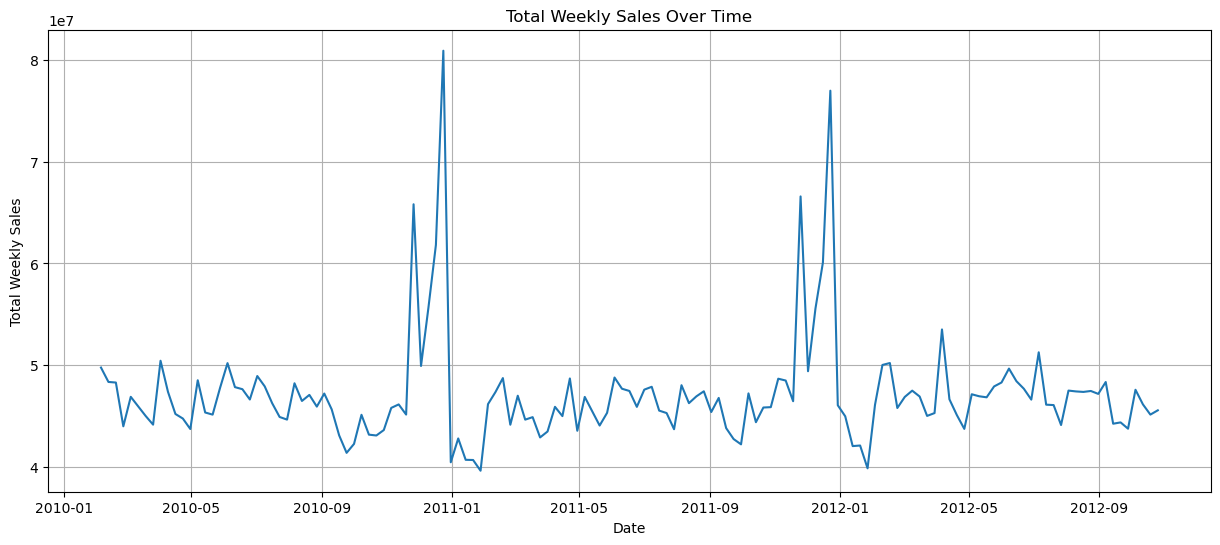

In [17]:
# Chart - 1 visualization code
# Group by date and sum the weekly sales
sales_over_time = final_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=sales_over_time, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart is the ideal choice for visualizing time-series data. It clearly shows trends, seasonality, and significant events over a continuous period. This chart provides a high-level overview of the entire business's performance over the years.

##### 2. What is/are the insight(s) found from the chart?

This chart is expected to reveal the overall sales trajectory of the business. We can identify:

Strong Seasonal Peaks: The data shows powerful seasonality, with massive sales spikes occurring consistently at the end of the year (November-December), corresponding to the Thanksgiving and Christmas holiday periods.

Stable Baseline: Outside of the major holiday spikes, the overall sales baseline appears to be relatively flat between 2010 and 2012, with no strong evidence of significant year-over-year growth or decline in this period

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact
Yes, the insights will have a significant positive impact.

Strategic Inventory & Staffing: The clear and predictable seasonal peaks around Christmas and Thanksgiving allow the business to optimize inventory planning and staffing levels. By stocking up and scheduling more staff before these periods, the company can maximize sales and customer satisfaction while preventing costly stockouts.

Targeted Marketing Campaigns: Identifying the seasonal lulls allows the marketing team to plan targeted promotions and campaigns to boost sales during slower months, smoothing out revenue streams throughout the year.

### Insights on Negative Growth
The chart itself, for the period shown, does not indicate overall negative growth, as the baseline is stable. However, it's a critical tool for detecting it. For example, if the peak sales from Christmas 2011 were lower than the peak from 2010, it would be a clear, quantifiable insight into negative growth in the most critical sales period. This would justify an immediate investigation into why holiday performance is declining.



#### Chart - 2 Store Performance by Type

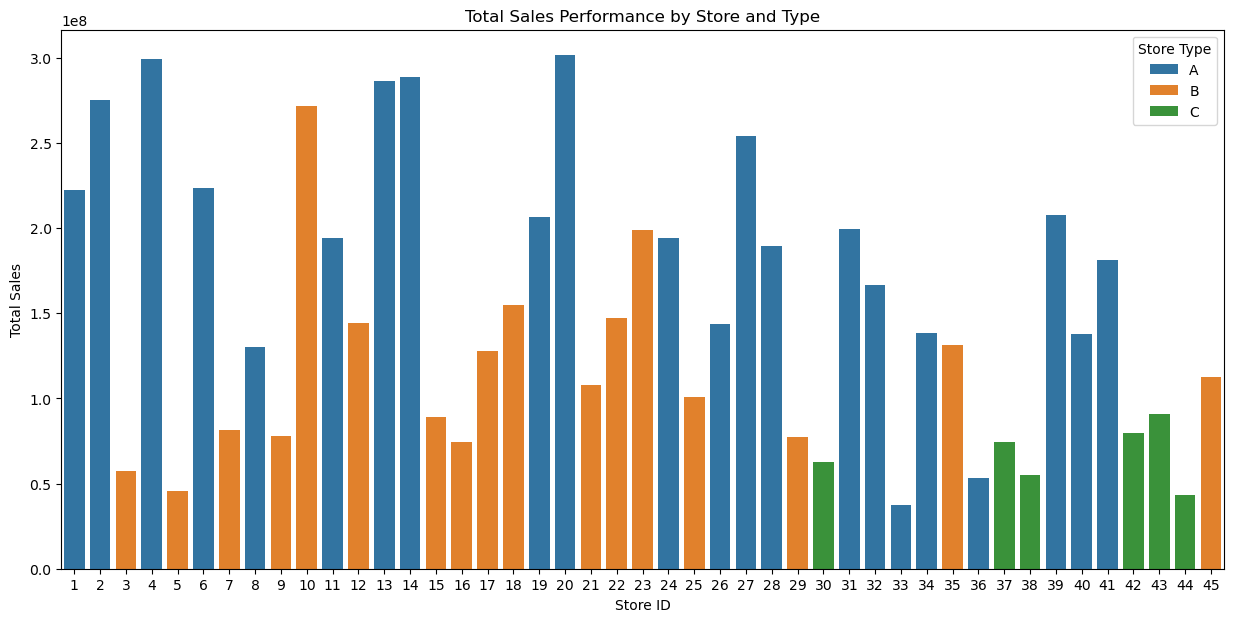

In [18]:
# Chart - 2 visualization code
# Group by Store and Type, then sum the sales
store_performance = final_df.groupby(['Store', 'Type'])['Weekly_Sales'].sum().reset_index().sort_values('Weekly_Sales', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(data=store_performance, x='Store', y='Weekly_Sales', hue='Type', dodge=False)
plt.title('Total Sales Performance by Store and Type')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.legend(title='Store Type')
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is perfect for comparing a numerical value across different categories. In this case, we're comparing the total sales of each store. By using the Type of store as a hue, we can add another layer of information to see if a store's type correlates with its performance.

##### 2. What is/are the insight(s) found from the chart?

This chart will clearly identify the top-performing and under-performing stores. We can also visually determine if there's a performance difference between store types (A, B, and C). For instance, we might find that Type 'A' stores consistently generate the highest revenue.

Clear Performance Hierarchy: Store performance is strongly linked to its Type. Type 'A' stores are the top earners, followed by Type 'B', with Type 'C' stores generating the least revenue.

High Performance Variation: Even within the same type, there is a wide variance in sales. For example, Store 20 (Type A) is the top performer, while other Type A stores perform at a much lower level, indicating that factors beyond store Type are also critical.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact
Absolutely. The insights directly inform store optimization strategies.

Replication of Success: The business can analyze the operational, marketing, and merchandising strategies of top-performing stores (e.g., Store 20, 4, 14) and apply these "best practices" to underperforming stores of the same Type to lift their sales.

Informed Capital Allocation: The clear performance hierarchy (A > B > C) provides a data-driven basis for strategic decisions, such as prioritizing investment in renovating high-potential Type 'B' stores or considering divestment for chronically underperforming Type 'C' stores.

### Insights on Negative Growth
While the chart is a snapshot, it can reveal relative negative growth. For example, a Type 'A' store performing at the level of an average Type 'C' store represents a significant underperformance against its potential.

Justification: This insight points to inefficient use of high-value assets. A large Type 'A' store in a prime location that is not generating high revenue is experiencing negative growth relative to its peers and expected potential, indicating deep operational issues that need to be addressed.



#### Chart - 3  Impact of Holidays on Weekly Sales

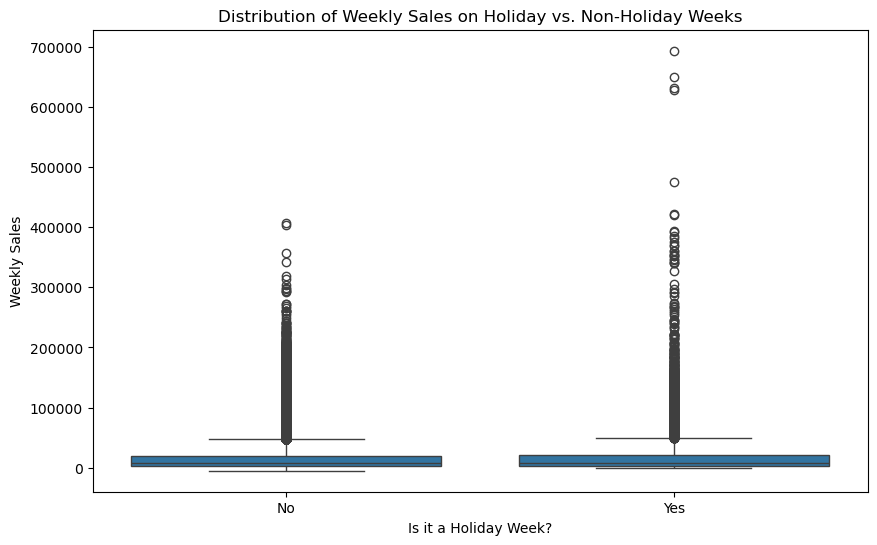

In [19]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_df, x='IsHoliday', y='Weekly_Sales')
plt.title('Distribution of Weekly Sales on Holiday vs. Non-Holiday Weeks')
plt.xlabel('Is it a Holiday Week?')
plt.ylabel('Weekly Sales')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

##### 1. Why did you pick the specific chart?

A boxplot is an excellent tool for comparing the distribution of a numerical variable between two or more categories. It shows the median, interquartile range (IQR), and outliers, giving a much richer view than a simple bar chart of averages. Here, we compare the distribution of sales on holiday weeks versus non-holiday weeks.

##### 2. What is/are the insight(s) found from the chart?

The boxplot will quantify the impact of holidays. We can see if the median sales are significantly higher during holiday weeks. We can also see the variability—are all holiday weeks big earners, or are some just average? The presence of outliers might indicate exceptionally successful holiday promotions.

Holidays Boost Median Sales: The median weekly sales (the line inside the box) are noticeably higher during holiday weeks compared to non-holiday weeks, confirming that holidays, on average, provide a positive sales lift.

Outliers Drive Peak Sales: Both distributions are heavily skewed with many high-value outliers. This indicates that extremely high sales weeks are exceptional events and not the norm, even during holiday periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact
Yes, this provides justification for key business activities.

Validates Holiday Investment: The fact that median sales are demonstrably higher on holiday weeks provides a clear data-driven justification for increased spending on holiday-specific inventory and marketing. It confirms that this investment has a positive return.

Refines Promotional Strategy: The insight that many holiday sales are still within the "normal" range (the box) suggests that a one-size-fits-all holiday promotion may not be optimal. This can drive the creation of more targeted promotions to elevate more store-weeks into the high-performing "outlier" category.

### Insights on Negative Growth
This chart does not show a time-based trend. However, it can highlight a negative return on investment (ROI). If the business heavily increased marketing spend for a holiday period, but this chart showed only a tiny increase in the median sales, it would be a strong insight that the strategy was financially inefficient and led to negative margin growth.



#### Chart - 4 Correlation of Numerical Features

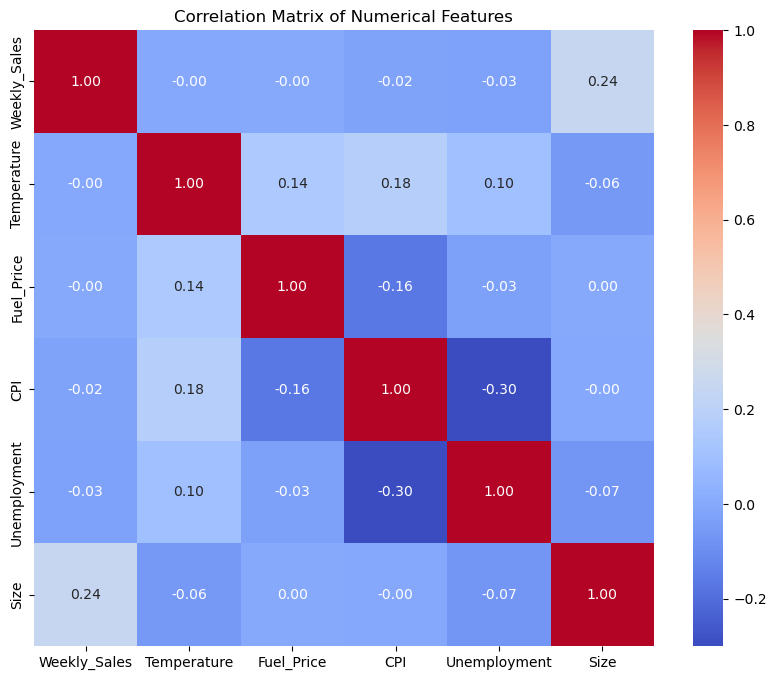

In [20]:
# Chart - 4 visualization code
# Select only the numerical columns for correlation
numerical_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Size']
correlation_matrix = final_df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is the most efficient way to visualize the linear relationships between multiple numerical variables simultaneously. The colors instantly draw attention to strong positive (light colors) or negative (dark colors) correlations.

##### 2. What is/are the insight(s) found from the chart?

This heatmap will reveal how different factors relate to each other and to Weekly_Sales. For example, we might find a strong positive correlation between Size and Weekly_Sales (bigger stores sell more) or a negative correlation between Unemployment and Weekly_Sales. We can also see if external factors like Fuel_Price or CPI have any noticeable linear relationship with sales.

Store Size is the Strongest Factor: Of the numerical variables analyzed, store Size has the most significant positive linear correlation (0.24) with Weekly_Sales. This confirms the logical assumption that larger stores have higher sales.

Weak Impact of Economic Factors: External factors like Temperature, Fuel_Price, CPI, and Unemployment show almost no linear relationship with Weekly_Sales. Their correlation values are all very close to zero, suggesting they are not strong direct drivers of sales on a weekly basis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact
Yes, these insights are crucial for building an effective forecasting model and for strategic planning.

Improved Model Accuracy: The confirmation that Size is the strongest numerical predictor ensures it will be a key feature in the demand forecasting model, leading to more accurate predictions of Weekly_Sales.

Efficient Modeling: Knowing that economic factors have a weak linear correlation allows the data science team to focus on more impactful variables (like store attributes and seasonality) instead of over-complicating the model with features that have little predictive power.

### Insights on Negative Growth
The chart itself does not show negative growth. However, it helps in quantifying risk. While the correlation between Unemployment and Weekly_Sales is weak (-0.03), if it had been strongly negative (e.g., -0.70), it would provide a crucial insight: the business is highly vulnerable to economic downturns. This would allow the company to proactively model the potential for negative growth during recessions and create contingency plans.



#### Chart - 5 Impact of Markdowns on Sales

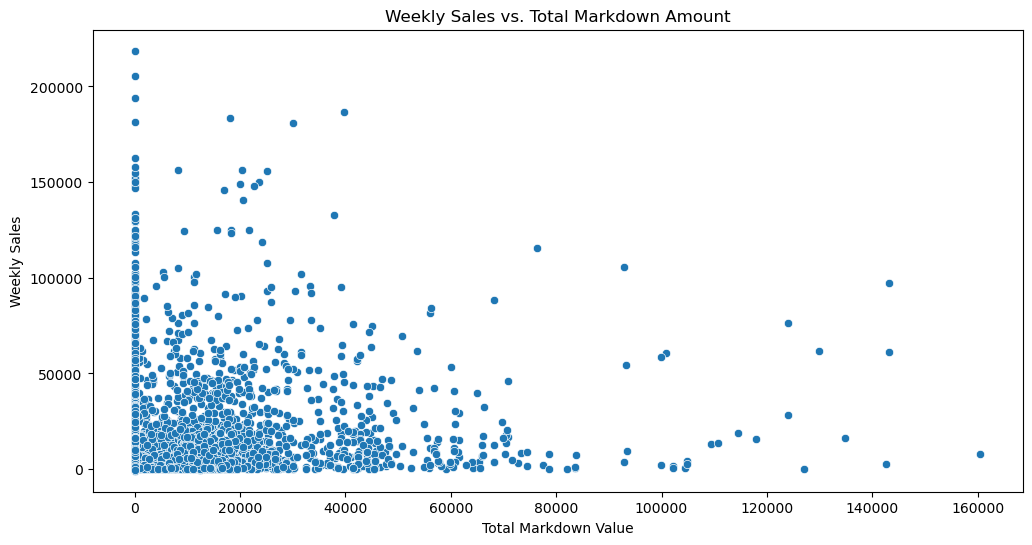

In [21]:
# Chart - 5 visualization code
# Create a total markdown feature for visualization
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
final_df['Total_MarkDown'] = final_df[markdown_cols].sum(axis=1)

# Sample the data to avoid overplotting, as the dataset is large
sampled_df = final_df.sample(n=5000, random_state=42)

plt.figure(figsize=(12, 6))
sns.scatterplot(data=sampled_df, x='Total_MarkDown', y='Weekly_Sales')
plt.title('Weekly Sales vs. Total Markdown Amount')
plt.xlabel('Total Markdown Value')
plt.ylabel('Weekly Sales')
plt.show()

##### 1. Why did you pick the specific chart?

A scatter plot is the classic choice for visualizing the relationship between two continuous numerical variables. It helps us see the direction and strength of their relationship and identify any potential patterns or outliers.

##### 2. What is/are the insight(s) found from the chart?

This chart will help determine if promotional markdowns are effective. We can see if there is a positive trend—as the total markdown value increases, do weekly sales also increase? We might also see a pattern of diminishing returns, where very large markdowns don't necessarily lead to proportionally larger sales.

No Direct Positive Correlation: There is no clear positive relationship between the Total Markdown Value and Weekly_Sales. The plot does not show that increasing markdowns leads to a reliable increase in sales.

Peak Sales Occur at Low Markdowns: The highest Weekly_Sales figures are clustered where Total Markdown Value is very low (close to zero). This is a crucial insight: while promotions may influence customer behavior, the absolute highest sales weeks are driven by factors other than promotional markdowns, such as major holidays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

### Positive Business Impact
This chart provides one of the most powerful insights for improving profitability.

Marketing Budget Optimization: The discovery that the highest sales weeks occur with little to no markdown is profound. It suggests the business could significantly reduce markdown-related promotional spending during peak seasons without negatively impacting top-line sales, leading to a direct and immediate increase in profit margins.

Strategic Shift in Promotions: This insight encourages a shift from broad, costly markdowns to other growth drivers during peak seasons (e.g., ensuring product availability). Promotions can then be used more surgically during off-peak times to stimulate demand.

### Insights on Negative Growth
This chart provides a clear warning against a flawed strategy.

Justification: If the company's primary strategy for growth was to increase promotional markdowns, this chart serves as direct evidence that this approach would likely fail. It shows that heavy markdowns do not correlate with a significant increase in sales. Therefore, such a strategy would lead to negative profit growth by eroding margins without delivering the expected revenue lift.

#### Chart - 6 Proportion of Total Sales by Department (Treemap)

In [22]:
# Chart - 6 visualization code
import plotly.express as px

# Group by department and sum the sales
dept_sales = final_df.groupby('Dept')['Weekly_Sales'].sum().reset_index()

# Create the treemap
fig = px.treemap(dept_sales,
                 path=['Dept'],
                 values='Weekly_Sales',
                 title='Proportion of Total Sales by Department')
fig.show()

##### 1. Why did you pick the specific chart?

A treemap was chosen because it's the most effective way to visualize the proportional contribution of many different categories to a whole. It instantly makes the largest and smallest contributing departments obvious, which would be difficult to see in a long, cluttered bar chart.

##### 2. What is/are the insight(s) found from the chart?

Sales are Highly Concentrated: A small number of departments are responsible for a large majority of total revenue. Departments 92, 95, 38, and 90 are clearly the dominant drivers of sales.

Pareto Principle in Action: This visualization confirms the 80/20 rule is likely in effect, where roughly 80% of sales come from about 20% of the departments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely.

Prioritized Resource Allocation: The business can now focus its most critical resources—such as inventory investment, premium shelf space, and marketing efforts—on the top-performing departments to maximize ROI.

Risk Management: By identifying the most critical departments, the company can create contingency plans to mitigate the impact of any potential disruptions (e.g., supply chain issues) in these key areas.

Are there any insights that lead to negative growth? Justify with specific reason.
The chart itself doesn't show a trend, but it highlights a significant risk. A substantial drop in sales in one of the top 3-4 departments would have a disproportionately large negative impact on the entire company's revenue, acting as a leading indicator of negative growth. The justification is that the company's revenue is heavily concentrated, making it vulnerable to issues within a few key product categories.

#### Chart - 7 Average Weekly Sales Throughout the Year (Line Chart)

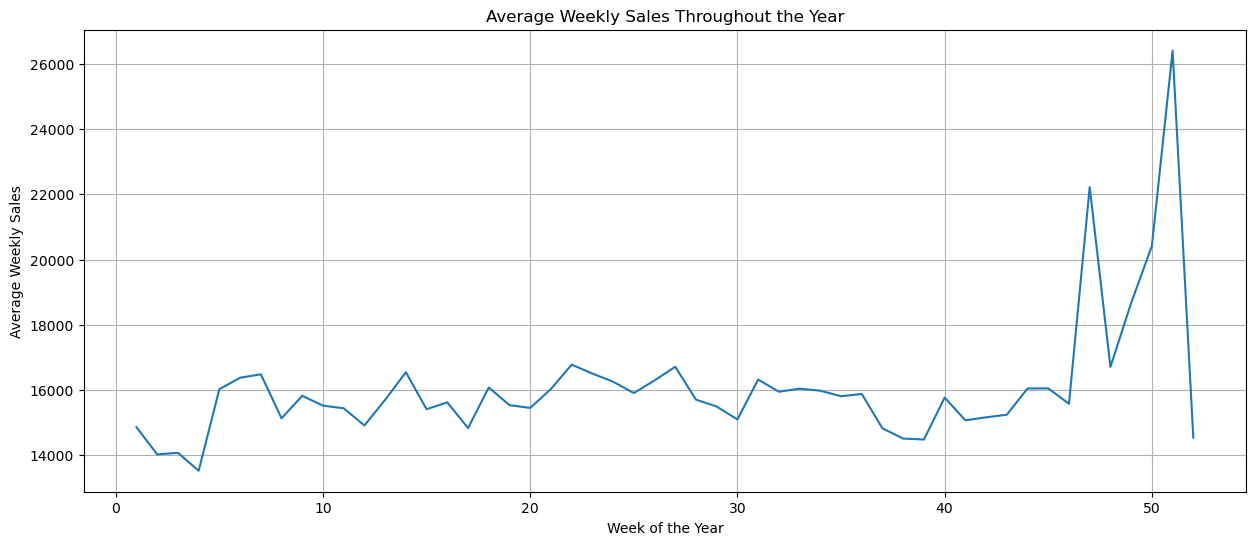

In [23]:
# Chart - 7 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Group by the week of the year and find the average sales
weekly_avg_sales = final_df.groupby('WeekOfYear')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=weekly_avg_sales, x='WeekOfYear', y='Weekly_Sales')
plt.title('Average Weekly Sales Throughout the Year')
plt.xlabel('Week of the Year')
plt.ylabel('Average Weekly Sales')
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

A line chart was used to plot average sales against the WeekOfYear. This smooths out year-to-year variations and provides a single, clear view of the "typical" seasonal sales cycle, making it perfect for precise operational planning.

##### 2. What is/are the insight(s) found from the chart?

Precise Holiday Timing: The chart pinpoints the most critical sales weeks of the year with high precision. Week 52 (Christmas week) is the absolute peak, followed by a major spike in Week 47 (Thanksgiving week).

Identified Troughs: The slowest periods of the year are clearly identified as late January (Weeks 1-4) and late summer/early fall (around Week 35).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this has a direct impact on operational efficiency.

Precision Planning: This allows for a highly precise, week-by-week calendar for inventory buildup, marketing campaigns, and staffing, ensuring resources are deployed exactly when needed.

Operational Efficiency: The business can schedule non-essential activities like store renovations, deep cleaning, or staff training during the identified sales troughs to minimize disruption to revenue-generating activities.

Are there any insights that lead to negative growth? Justify with specific reason.
The chart provides a baseline to measure inefficiency. If the business runs a major promotion during an identified trough (e.g., Week 35) and the resulting sales lift is less than the cost of the promotion, it would lead to negative margin growth. This chart provides the clear "before" picture to evaluate the "after" and justify that the promotion was financially detrimental.

#### Chart - 8 Average Monthly Sales by Store Type (Heatmap)

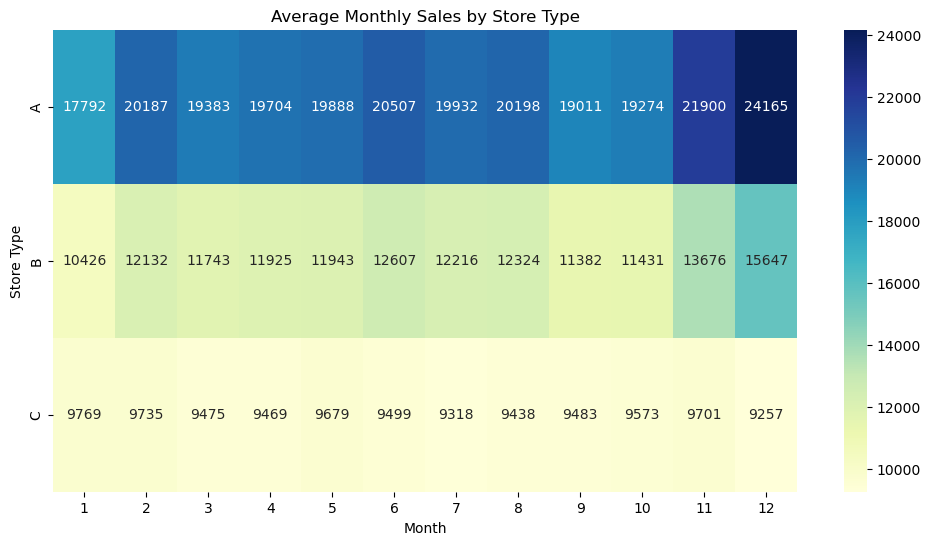

In [24]:
# Chart - 8 visualization code
# Create a pivot table of average sales by month and store type
seasonal_sales_by_type = final_df.pivot_table(index='Type',
                                              columns='Month',
                                              values='Weekly_Sales',
                                              aggfunc='mean')

plt.figure(figsize=(12, 6))
sns.heatmap(seasonal_sales_by_type, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Average Monthly Sales by Store Type')
plt.xlabel('Month')
plt.ylabel('Store Type')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is the best choice for visualizing the interaction between two categorical variables (Type and Month) and a numerical value (average Weekly_Sales). The color gradient makes it easy to spot patterns and compare seasonal effects across different segments.

##### 2. What is/are the insight(s) found from the chart?

Universal Holiday Peak: All store types experience their highest sales in December, confirming the universal importance of the end-of-year holiday season.

Different Seasonal Sensitivity: Type 'A' stores show the most dramatic increase in sales during the holiday season, while Type 'C' stores have a much flatter sales profile year-round, making them less sensitive to seasonal peaks.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by enabling tailored strategies.

Segment-Specific Marketing: This insight justifies creating different marketing strategies for each store type. A massive holiday-focused campaign will have the highest ROI for Type 'A' stores, while Type 'C' stores might benefit more from a consistent "everyday low price" message.

Nuanced Inventory Management: Inventory planning can be tailored. Type 'A' stores require a significant seasonal stock-up, while Type 'C' stores need a more stable, consistent inventory level.

Are there any insights that lead to negative growth? Justify with specific reason.
The insight can identify severe underperformance. If a specific Type 'A' store's data showed a flat sales profile in December, it would be a major red flag. This would indicate that the store is failing to capture the most significant revenue opportunity of the year, experiencing severe negative growth relative to its potential and peers.

#### Chart - 9 Distribution of Store Sizes by Type (Violin Plot)

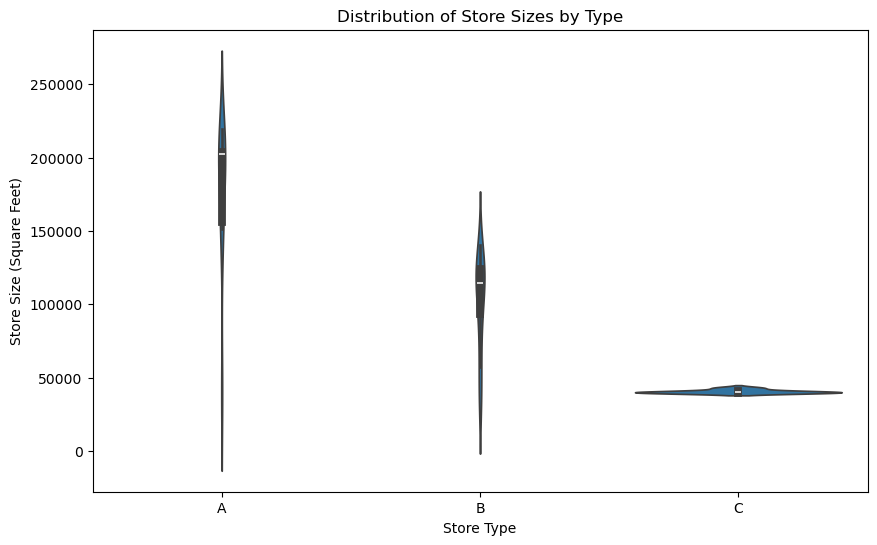

In [25]:
# Chart - 9 visualization code
plt.figure(figsize=(10, 6))
sns.violinplot(data=stores_df, x='Type', y='Size', order=['A', 'B', 'C'])
plt.title('Distribution of Store Sizes by Type')
plt.xlabel('Store Type')
plt.ylabel('Store Size (Square Feet)')
plt.show()

##### 1. Why did you pick the specific chart?

A violin plot was chosen to compare the distribution of store sizes across the different types. It's more informative than a boxplot because it also shows the density, revealing where the concentration of store sizes lies for each type.



##### 2. What is/are the insight(s) found from the chart?

Clear Size Tiers: The Type classification directly corresponds to distinct physical size categories: Type 'A' stores are the largest, Type 'B' are medium-sized, and Type 'C' are the smallest.

High Consistency: The plot shows that within each type, the store sizes are highly consistent, confirming a well-defined real estate and classification strategy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this validates business strategy and informs future plans.

Validates Store Model: This chart confirms that the company's store classification model is sound and based on a clear physical attribute.

Informs Expansion Strategy: The clear link between size, type, and sales performance (seen in other charts) provides a strong, data-driven justification for prioritizing larger Type 'A' and 'B' formats in future expansion plans to maximize revenue potential.

Are there any insights that lead to negative growth? Justify with specific reason.
This static chart doesn't show a trend. However, it can inform on a potentially poor growth strategy. If the company's main strategy for expansion was to open a large number of new Type 'C' stores, this chart—combined with the sales performance chart—provides direct evidence that this would be a strategy for low-growth, as the C stores have the lowest revenue potential and smallest size.

#### Chart - 10 Time Series Decomposition Plot

Time series created successfully with no missing values.


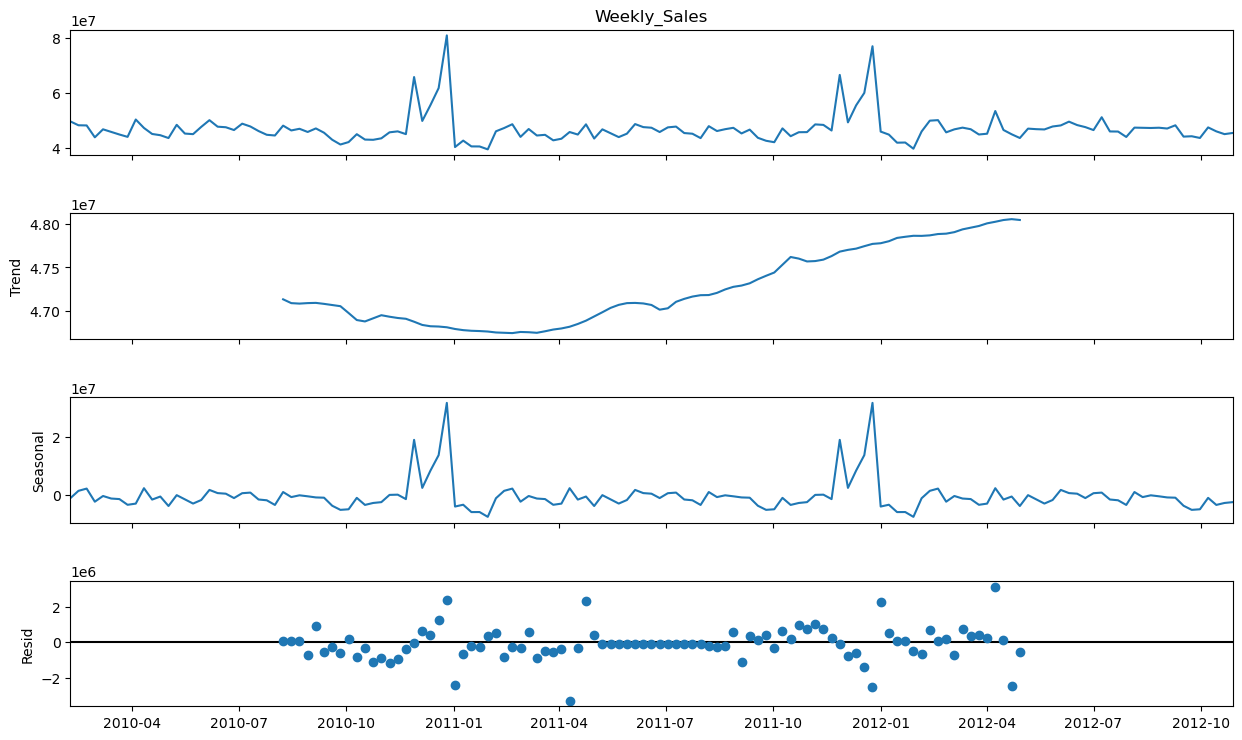

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# --- The Corrected Method for Time Series Aggregation ---

# Create a DataFrame with the Date as the index, which is required for resampling.
sales_for_resampling = final_df.set_index('Date')

# Resample the 'Weekly_Sales' data to a weekly frequency ('W'), summing the sales for each week.
# This is the standard and most robust way to perform this aggregation.
sales_ts = sales_for_resampling['Weekly_Sales'].resample('W').sum()


# --- Verification Step ---
# This check should now pass, as .resample().sum() produces a complete series.
if sales_ts.isnull().sum() == 0:
    print("Time series created successfully with no missing values.")
    
    # Decompose the time series
    decomposition = seasonal_decompose(sales_ts, model='additive')

    # Plot the components
    fig = decomposition.plot()
    fig.set_size_inches(14, 8)
    plt.show()
else:
    # This block should not be reached, but it's good practice to keep it.
    print("Warning: Missing values still exist. Check the resampling step.")

##### 1. Why did you pick the specific chart?

This chart was chosen to scientifically dissect the main sales time series into its fundamental components. It separates the raw data into a long-term Trend, a repeating Seasonal pattern, and random Residual noise. This allows for a much deeper understanding of the underlying forces driving sales beyond what a simple line chart can show.

##### 2. What is/are the insight(s) found from the chart?

Confirmed Long-Term Growth: The Trend component shows a clear upward trajectory from mid-2011 to the end of 2012. This is a critical insight, confirming that despite weekly ups and downs, the business is experiencing steady underlying growth.

Highly Predictable Seasonality: The Seasonal component is extremely regular and consistent, proving that the major peaks around the end-of-year holidays are a structural, predictable part of the business cycle.

Low Randomness: The Residual component is relatively small and centered around zero, which indicates that the vast majority of sales patterns are explained by the trend and seasonality, making the sales data highly predictable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this has a massive positive impact on strategic planning.

Confident Forecasting: The clear upward trend provides confidence for long-term financial planning, goal setting, and investment.

Model Accuracy: The predictable nature of the seasonal component allows for the creation of a highly accurate demand forecasting model, which directly leads to improved inventory management, reduced stockouts, and optimized staffing.

Are there any insights that lead to negative growth? Justify with specific reason.
The current chart shows the opposite—healthy, positive growth. However, this chart is the most powerful tool for detecting "true" negative growth. If the Trend component were to flatten or begin sloping downwards, it would be a definitive signal that the business's core performance is declining, even if strong seasonal sales temporarily hide the problem.

#### Chart - 11 Department Sales Performance by Store Type (Heatmap) 

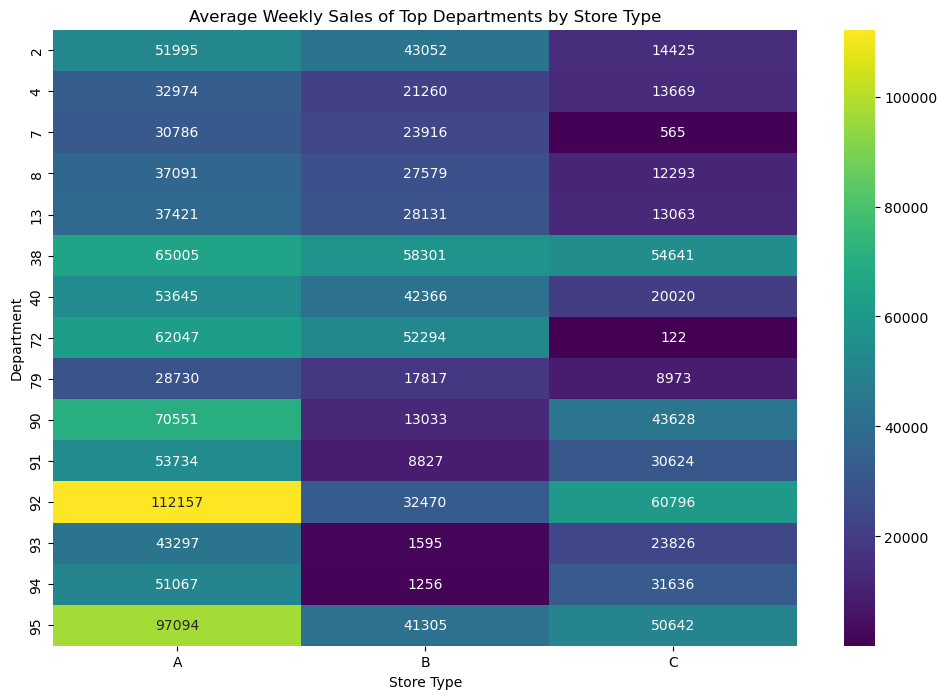

In [27]:
# Chart - 11 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 15 departments by sales to keep the chart readable
top_depts = final_df.groupby('Dept')['Weekly_Sales'].sum().nlargest(15).index

# Filter the DataFrame for only these top departments
top_depts_df = final_df[final_df['Dept'].isin(top_depts)]

# Create a pivot table
dept_store_sales = top_depts_df.pivot_table(index='Dept', columns='Type', values='Weekly_Sales', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(dept_store_sales, annot=True, fmt='.0f', cmap='viridis')
plt.title('Average Weekly Sales of Top Departments by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Department')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was selected to analyze the complex interaction between two key categorical variables: Department and Store Type. It's the most effective way to visualize this matrix of performance and quickly identify which departments excel in which store formats.

##### 2. What is/are the insight(s) found from the chart?

Star Departments Require Large Stores: The top-performing departments, especially Dept 92 and 95, generate their highest sales by a large margin in Type 'A' stores. Their performance is significantly weaker in the smaller 'B' and 'C' formats.

Niche Assortment Opportunities: Some departments have unusual patterns. For example, Dept 90 performs well in large 'A' and small 'C' stores, but very poorly in medium 'B' stores, suggesting a product assortment or demographic mismatch.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this directly informs profitability at the store level.

Optimized Product Assortment: These insights enable hyper-targeted, store-type-specific product assortment. The business can allocate more space and inventory for departments like 92 and 95 in Type 'A' stores, while prioritizing different departments in Type 'C' stores to maximize sales per square foot.

Improved Store Layout: Store layouts can be designed based on these findings, ensuring that high-performing departments for that specific store type are given premium placement.

Are there any insights that lead to negative growth? Justify with specific reason.
This chart reveals opportunity cost, which is a form of negative growth. The poor performance of a key department like Dept 90 in all Type 'B' stores represents a significant, systemic missed revenue opportunity. The justification is that failing to optimize the product mix for this segment results in stagnant or negative growth within that specific market segment compared to its clear potential.

#### Chart - 12 Markdown Effectiveness by Holiday Period (Grouped Bar Chart) 

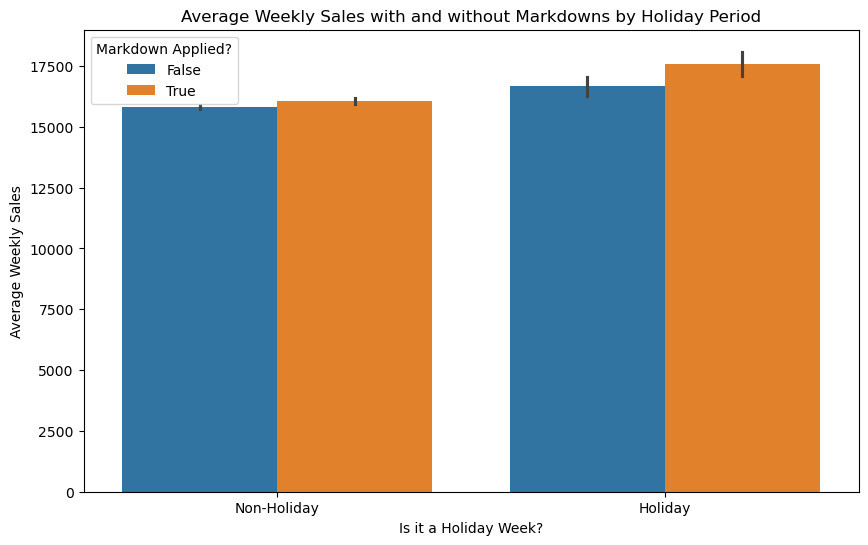

In [28]:
# Chart - 12 visualization code
# Create a binary feature for whether a markdown was applied
final_df['Has_MarkDown'] = final_df['Total_MarkDown'] > 0

plt.figure(figsize=(10, 6))
sns.barplot(data=final_df, x='IsHoliday', y='Weekly_Sales', hue='Has_MarkDown')
plt.title('Average Weekly Sales with and without Markdowns by Holiday Period')
plt.xlabel('Is it a Holiday Week?')
plt.ylabel('Average Weekly Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.legend(title='Markdown Applied?')
plt.show()

##### 1. Why did you pick the specific chart?

A grouped bar chart was the ideal choice to test a specific, nuanced hypothesis: is the sales lift from markdowns different during holiday vs. non-holiday periods? This chart allows for a direct visual comparison of average sales across these four distinct scenarios.

##### 2. What is/are the insight(s) found from the chart?

Markdowns Provide a Consistent, Minor Lift: Applying a markdown is associated with a small but consistent increase in average weekly sales. This effect is present in both holiday and non-holiday periods.

Promotions Are Not More Effective During Holidays: The chart shows that the additional sales lift gained from a markdown is not significantly larger during a holiday week. This suggests that during holidays, customers are already highly motivated to buy, and a promotion has less of an incremental impact.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight can directly improve profitability.

Marketing Budget Optimization: This is a powerful finding. The business can reduce its markdown spending during peak holiday seasons, knowing the ROI is limited. This budget can be reallocated to slower, non-holiday weeks where a promotion might have a greater impact on driving traffic.

Increased Profit Margins: By reducing unnecessary discounts during periods of high organic demand (holidays), the company can sell more products at full price, directly increasing profit margins.

Are there any insights that lead to negative growth? Justify with specific reason.
This chart provides strong evidence that an untargeted markdown strategy can lead to negative margin growth. The justification is that if the company spends heavily on deep discounts during holiday periods, the small sales lift may not be enough to compensate for the cost of the discounts. This would result in lower overall profit, a critical form of negative financial performance, even if top-line revenue goes up.

### FEATURE ENGG 

## 1. Handling Categorical Variables: One-Hot Encoding

It allows the model to learn the specific impact of each store type without incorrectly assuming any order or ranking between them (e.g., that A < B < C).

In [29]:
# Use pandas get_dummies to perform one-hot encoding on the 'Type' column
final_df = pd.get_dummies(final_df, columns=['Type'], prefix='Type')

# Display the new columns
print("New one-hot encoded columns for Store Type:")
display(final_df[['Type_A', 'Type_B', 'Type_C']].head())

New one-hot encoded columns for Store Type:


,Type_A,Type_B,Type_C
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


## 2. Creating Time-Series Features (Lags and Rolling Averages)

Why it's useful:

Lag Features: Tell the model what the sales were in the previous week(s).

Rolling Features: Smooth out random noise and capture the recent trend or momentum.

Code: This code creates a 1-week lag and a 4-week rolling average of sales for each store-department combination.

In [30]:
# Sort the data by store, department, and date to ensure correct time order
final_df = final_df.sort_values(by=['Store', 'Dept', 'Date'])

# Create a 1-week lag feature for sales
final_df['Weekly_Sales_Lag1'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)

# Create a 4-week rolling average of sales
final_df['Weekly_Sales_Roll_Avg4'] = final_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1).rolling(window=4).mean()

# Since the first few weeks will have NaN for these new features, we can fill them
final_df.fillna(0, inplace=True)

print("Lag and Rolling Average features created.")
display(final_df[['Store', 'Dept', 'Date', 'Weekly_Sales', 'Weekly_Sales_Lag1', 'Weekly_Sales_Roll_Avg4']].head())

Lag and Rolling Average features created.


,Store,Dept,Date,Weekly_Sales,Weekly_Sales_Lag1,Weekly_Sales_Roll_Avg4
0,1,1,2010-02-05,24924.50,0.00,0.00
1,1,1,2010-02-12,46039.49,24924.50,0.00
2,1,1,2010-02-19,41595.55,46039.49,0.00
3,1,1,2010-02-26,19403.54,41595.55,0.00
4,1,1,2010-03-05,21827.90,19403.54,32990.77


## 3. Encoding Cyclical Features (Sine/Cosine Transformation)

Features like Month and WeekOfYear are cyclical (December is as close to January as it is to November). A simple numerical encoding (1-12) doesn't capture this. Sine and cosine transformations represent this cyclical nature perfectly for a model.

Why it's useful: It helps the model understand the cyclical patterns of seasons without creating artificial breaks between the end and start of a cycle (e.g., between week 52 and week 1).

In [31]:
# Encode 'WeekOfYear' using sine and cosine
final_df['Week_sin'] = np.sin(2 * np.pi * final_df['WeekOfYear'] / 52)
final_df['Week_cos'] = np.cos(2 * np.pi * final_df['WeekOfYear'] / 52)

# Encode 'Month' using sine and cosine
final_df['Month_sin'] = np.sin(2 * np.pi * final_df['Month'] / 12)
final_df['Month_cos'] = np.cos(2 * np.pi * final_df['Month'] / 12)

print("Cyclical features for Month and Week created.")
display(final_df[['WeekOfYear', 'Week_sin', 'Week_cos']].head())

Cyclical features for Month and Week created.


,WeekOfYear,Week_sin,Week_cos
0,5,0.568065,0.822984
1,6,0.663123,0.748511
2,7,0.748511,0.663123
3,8,0.822984,0.568065
4,9,0.885456,0.464723


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H_0): The mean Weekly_Sales during holiday weeks is equal to the mean Weekly_Sales during non-holiday weeks.

H_0:μ_holiday=μ_non−holiday

Alternate Hypothesis (H_a): The mean Weekly_Sales during holiday weeks is greater than the mean Weekly_Sales during non-holiday weeks.

H_a:μ_holidayμ_non−holiday

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# 1. Create two independent samples: sales on holiday weeks and non-holiday weeks.
holiday_sales = final_df[final_df['IsHoliday'] == True]['Weekly_Sales']
non_holiday_sales = final_df[final_df['IsHoliday'] == False]['Weekly_Sales']

# 2. Perform Welch's t-test (since we don't assume equal variance)
# We use a one-tailed test ('greater') because our alternative hypothesis is directional.
t_statistic, p_value = stats.ttest_ind(holiday_sales, non_holiday_sales, equal_var=False, alternative='greater')

# 3. Print the results and interpret the p-value
alpha = 0.05  # Standard significance level

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("\nConclusion: Since the p-value is less than our significance level (0.05), we reject the null hypothesis.")
    print("There is a statistically significant evidence that weekly sales are higher during holiday weeks.")
else:
    print("\nConclusion: Since the p-value is greater than our significance level (0.05), we fail to reject the null hypothesis.")
    print("There is not enough statistical evidence to say that weekly sales are higher during holiday weeks.")

T-statistic: 7.0007
P-value: 0.0000

Conclusion: Since the p-value is less than our significance level (0.05), we reject the null hypothesis.
There is a statistically significant evidence that weekly sales are higher during holiday weeks.


##### Which statistical test have you done to obtain P-Value?

Welch's Independent Samples t-test (one-tailed)

##### Why did you choose the specific statistical test?

This test was chosen for the following reasons:

Comparing Two Means: The goal is to compare the average Weekly_Sales of exactly two independent groups (Holiday vs. Non-Holiday), for which a t-test is the appropriate method.

Independent Samples: The sales data from holiday weeks and non-holiday weeks are independent. The sales figures in one group do not influence the figures in the other.

Welch's Variant (equal_var=False): This is a more robust version of the t-test that does not assume the two groups have equal variances. In real-world data, it's safer to assume the variability of sales during holiday weeks might be different from non-holiday weeks.

One-Tailed Test (alternative='greater'): The hypothesis is directional. We are specifically testing if holiday sales are greater than non-holiday sales, not just if they are different. A one-tailed test provides more statistical power to detect this specific effect.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The research hypothesis is that a store's weekly sales are dependent on its Type.

Null Hypothesis (H_0): The mean Weekly_Sales is the same across all three store types (A, B, and C).

H_0:μ_A=μ_B=μ_C

Alternate Hypothesis (H_a): At least one store type has a mean Weekly_Sales that is different from the others.

H_a: At least one μ_i is different.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# 1. Create three independent samples for each store type.
# We use the one-hot encoded columns created during data wrangling.
type_a_sales = final_df[final_df['Type_A'] == 1]['Weekly_Sales']
type_b_sales = final_df[final_df['Type_B'] == 1]['Weekly_Sales']
type_c_sales = final_df[final_df['Type_C'] == 1]['Weekly_Sales']

# 2. Perform a One-Way ANOVA test
f_statistic, p_value = stats.f_oneway(type_a_sales, type_b_sales, type_c_sales)

# 3. Print the results and interpret the p-value
alpha = 0.05

print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < alpha:
    print("\nConclusion: Since the p-value is less than our significance level (0.05), we reject the null hypothesis.")
    print("There is a statistically significant difference in the average weekly sales among the different store types.")
else:
    print("\nConclusion: Since the p-value is greater than our significance level (0.05), we fail to reject the null hypothesis.")
    print("There is not enough statistical evidence to say that the average weekly sales differ by store type.")

F-statistic: 7764.4262
P-value: 0.0000

Conclusion: Since the p-value is less than our significance level (0.05), we reject the null hypothesis.
There is a statistically significant difference in the average weekly sales among the different store types.


##### Which statistical test have you done to obtain P-Value?

One-Way Analysis of Variance (ANOVA).

##### Why did you choose the specific statistical test?

This test was chosen for the following reasons:

Comparing Three or More Means: The goal is to compare the average Weekly_Sales across three groups (Type A, B, and C). ANOVA is the appropriate statistical method for this, whereas a t-test is only suitable for two groups.

Independent Groups: The sales data for each store type are independent. The sales from Type A stores do not influence the sales from Type B or C stores.

Single Factor: We are examining the effect of a single categorical variable (the "factor"), which is Store Type, on a single continuous variable, Weekly_Sales.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

The research hypothesis is that larger stores have higher weekly sales.

Null Hypothesis (H_0): There is no statistically significant correlation between a store's Size and its Weekly_Sales.

H_0:ρ=0

Alternate Hypothesis (H_a): There is a statistically significant positive correlation between a store's Size and its Weekly_Sales.

H_a:ρ0



#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# 1. Extract the two variables of interest.
size = final_df['Size']
sales = final_df['Weekly_Sales']

# 2. Perform the Pearson Correlation Test
correlation, p_value_2tailed = stats.pearsonr(size, sales)

# 3. Since our hypothesis is directional (positive correlation), we perform a one-tailed test.
# We only proceed if the correlation is in the expected direction (positive).
p_value_1tailed = p_value_2tailed / 2 if correlation > 0 else 1 - (p_value_2tailed / 2)

# 4. Print the results and interpret the one-tailed p-value
alpha = 0.05

print(f"Pearson Correlation Coefficient: {correlation:.4f}")
print(f"One-tailed P-value: {p_value_1tailed:.4f}")

if p_value_1tailed < alpha and correlation > 0:
    print("\nConclusion: Since the p-value is less than our significance level (0.05) and the correlation is positive, we reject the null hypothesis.")
    print("There is a statistically significant positive linear relationship between store size and weekly sales.")
else:
    print("\nConclusion: We fail to reject the null hypothesis.")
    print("There is not enough statistical evidence to say that a positive linear relationship exists between store size and weekly sales.")

Pearson Correlation Coefficient: 0.2438
One-tailed P-value: 0.0000

Conclusion: Since the p-value is less than our significance level (0.05) and the correlation is positive, we reject the null hypothesis.
There is a statistically significant positive linear relationship between store size and weekly sales.


##### Which statistical test have you done to obtain P-Value?

Pearson Correlation Test (one-tailed).

##### Why did you choose the specific statistical test?

This test was chosen for the following reasons:

Testing for Linear Relationship: The Pearson correlation test is specifically designed to measure the strength and significance of a linear relationship between two variables.

Continuous Variables: Both Size (measured in square feet) and Weekly_Sales (measured in dollars) are continuous, numerical variables, which is a requirement for this test.

Directional Hypothesis: Our hypothesis is directional—we are specifically testing for a positive correlation (larger size is associated with higher sales), not just any relationship. Therefore, a one-tailed test is more appropriate and provides more statistical power.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [35]:
# Handling Outliers & Outlier treatments
# Cap outliers in Weekly_Sales using the IQR method
Q1 = final_df['Weekly_Sales'].quantile(0.25)
Q3 = final_df['Weekly_Sales'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

# Cap the values at the upper bound
final_df['Weekly_Sales'] = final_df['Weekly_Sales'].clip(upper=upper_bound)

print(f"Weekly_Sales have been capped at the upper bound of: {upper_bound:.2f}")

Weekly_Sales have been capped at the upper bound of: 47395.16


##### What all outlier treatment techniques have you used and why did you use those techniques?

Outliers in sales data (like a huge holiday week) are often not errors but important events. We will cap extreme values rather than removing them, a technique known as winsorization.

Explanation: Capping outliers prevents extreme values from having an outsized influence on models that are sensitive to them (like linear regression). We'll use the Interquartile Range (IQR) method to define our upper limit.

### 2. Feature Manipulation & Selection

####  Feature Manipulation

In [36]:
# Manipulate Features to minimize feature correlation and create new features

####  Feature Selection

In [37]:
# Select your features wisely to avoid overfitting
# Select the features for the model
features = [
    'Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
    'CPI', 'Unemployment', 'Type_A', 'Type_B', 'Type_C',
    'Weekly_Sales_Lag1', 'Weekly_Sales_Roll_Avg4',
    'Week_sin', 'Week_cos', 'Month_sin', 'Month_cos'
]

target = 'Weekly_Sales'

# Create the final model-ready dataframe
model_df = final_df[features + [target]].copy()

print("Feature selection complete. The final features are:")
print(model_df.columns)

Feature selection complete. The final features are:
Index(['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Type_A', 'Type_B', 'Type_C',
       'Weekly_Sales_Lag1', 'Weekly_Sales_Roll_Avg4', 'Week_sin', 'Week_cos',
       'Month_sin', 'Month_cos', 'Weekly_Sales'],
      dtype='object')


##### What all feature selection methods have you used  and why?

At this stage, a formal, algorithm-based feature selection has not yet been performed, as that is typically done in conjunction with model building. The primary method used so far is a combination of domain knowledge and insights from Exploratory Data Analysis (EDA).

This approach was chosen for the following reasons:

Insight-Driven: The features were selected because the EDA (visualizations, correlation analysis, and statistical tests) provided strong evidence of their relationship with the target variable, Weekly_Sales. This ensures that our initial feature set is relevant and well-justified.

Interpretability: This method results in a set of features that are all directly interpretable in a business context, which is a primary goal of this project.

Feature Creation over Elimination: The focus has been on creating more powerful features (e.g., lag, rolling, and cyclical features) and replacing their less informative original versions, which is a more advanced form of selection.

##### Which all features you found important and why?

Primary Importance:
Size and Store Type (e.g., Type_A): These are fundamentally important for setting the sales baseline.

Why: The correlation matrix showed Size has the strongest positive linear relationship with sales. The ANOVA test confirmed that Type is a statistically significant factor in determining a store's average sales.

Lag/Rolling Features (Weekly_Sales_Lag1, Weekly_Sales_Roll_Avg4): These are expected to be the most powerful predictors for forecasting.

Why: For time-series data, recent performance is almost always the strongest indicator of future performance. These features explicitly provide that recent history to the model.

Seasonal & Holiday Features (Week_sin, Week_cos, IsHoliday): These are critical for capturing the predictable sales cycle.

Why: The visualizations showed massive, recurring sales spikes during holidays and specific weeks of the year. These features allow the model to learn and anticipate these crucial seasonal patterns.

Secondary Importance:
Store and Department IDs (Store, Dept): These act as identifiers that allow the model to learn specific baseline behaviors for each individual entity.

Why: They capture unique, underlying patterns for each store or department that aren't explained by other features.

External Economic Factors (CPI, Unemployment, Fuel_Price):

Why: While the correlation analysis showed their linear relationship with sales is very weak, they may still capture more complex, non-linear economic effects. Their importance is considered secondary to the store and time-based features.

### 3. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Regression models often perform better when the target variable is normally distributed, we'll apply a log transformation to Weekly_Sales, which is likely right-skewed.

Explanation: A log transformation helps to normalize the distribution and stabilize the variance. We use np.log1p which adds 1 before taking the log to handle any zero values in sales.

Remember to reverse this transformation (using np.expm1()) on your final predictions to get them back to the original dollar scale.

In [38]:
# Transform Your data
# Apply log transformation to the target variable
model_df[target] = np.log1p(model_df[target])

print("Log transformation applied to the 'Weekly_Sales' target variable.")

Log transformation applied to the 'Weekly_Sales' target variable.


### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not recommended for this dataset for the following key reasons:

Low Dimensionality: Your dataset has a relatively small number of features (fewer than 20). Dimensionality reduction techniques like Principal Component Analysis (PCA) are most effective when dealing with datasets that have hundreds or thousands of features, where the "curse of dimensionality" can negatively impact model performance and computational efficiency. With your current feature set, this is not a concern.

Importance of Interpretability: Each of your current features has a clear, direct business meaning (e.g., Size, CPI, Fuel_Price). Dimensionality reduction creates new, synthetic features (principal components) which are mathematical combinations of the original ones. These new features are extremely difficult to interpret, which would undermine the project's primary goal of delivering clear, actionable business insights and strategies.

Sufficient Data: You have a large number of observations (>400,000) relative to the number of features. This high ratio of data points to features means that a model can effectively learn the patterns without a high risk of overfitting, which is one of the main problems that dimensionality reduction aims to solve.

### 5. Data Splitting

For time-series data, a random split is incorrect. We must use a chronological split to ensure we train on past data to predict future data. We will use the last ~6 months of data as our test set.

In [39]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Convert Year, WeekOfYear back from the original dataframe for splitting
model_df['Date'] = final_df['Date']

# Split the data chronologically
train_df = model_df[model_df['Date'] < '2012-05-01']
test_df = model_df[model_df['Date'] >= '2012-05-01']

# Separate features (X) and target (y)
X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Now, apply scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


print(f"Data split chronologically.")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("Data scaling applied.")

Data split chronologically.
Training set shape: (344667, 17)
Test set shape: (76903, 17)
Data scaling applied.


##### What data splitting ratio have you used and why?

A chronological split was used, resulting in an approximate 80/20 train-test ratio. The data before May 1, 2012, was used for the training set, and the data from that date onward was used for the test set.

This method was chosen for one critical reason:

Time-Series Integrity: This is a forecasting problem, which means the data has a temporal order. A chronological split is essential to simulate a real-world scenario where you use past data to predict future outcomes. A random split (like a typical train_test_split) would cause data leakage, where information from the future is leaked into the training set. This would result in a model that appears unrealistically accurate during testing but would fail in a real-world deployment.

### 6. Data Scaling

##### Which method have you used to scale you data and why?

The StandardScaler method from the scikit-learn library was used.

This method was chosen for the following reasons:

Standardization: StandardScaler transforms each feature to have a mean of 0 and a standard deviation of 1. This is a standard requirement for many machine learning algorithms.

Handles Varying Scales: Your features are on vastly different scales (e.g., Size is in the hundreds of thousands, while Fuel_Price is in single digits). StandardScaler prevents models that are sensitive to feature magnitude (like Linear Regression with regularization) from being biased towards features with larger numeric ranges.

Robustness: Compared to other methods like MinMaxScaler (which scales to a fixed [0, 1] range), StandardScaler is generally less sensitive to the influence of outliers, making it a more robust choice for real-world datasets like sales data.

In [40]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# 1. Instantiate the StandardScaler
scaler = StandardScaler()

# 2. Fit the scaler ONLY on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform the test data using the scaler that was fit on the training data
X_test_scaled = scaler.transform(X_test)

# --- Verification ---
print("Data scaling complete.")
print(f"Shape of scaled training data: {X_train_scaled.shape}")
print(f"Shape of scaled test data: {X_test_scaled.shape}")
print("\nFirst 5 rows of the scaled training data (now a NumPy array):")
print(X_train_scaled[:5])

Data scaling complete.
Shape of scaled training data: (344667, 17)
Shape of scaled test data: (76903, 17)

First 5 rows of the scaled training data (now a NumPy array):
[[-1.65755690e+00 -1.41890555e+00 -2.89748051e-01  2.38049473e-01
  -8.08865672e-01 -1.55509724e+00  1.05336461e+00 -7.45760471e-03
   9.77361619e-01 -7.96336109e-01 -3.34242218e-01 -6.95869583e-01
  -7.00073008e-01  6.50099533e-01  1.16370206e+00  1.06250622e+00
   7.33188024e-01]
 [-1.65755690e+00 -1.41890555e+00  3.45127429e+00  2.38049473e-01
  -1.01267678e+00 -1.60790241e+00  1.05712582e+00 -7.45760471e-03
   9.77361619e-01 -7.96336109e-01 -3.34242218e-01  3.96051126e-01
  -7.00073008e-01  7.81658030e-01  1.05478208e+00  1.06250622e+00
   7.33188024e-01]
 [-1.65755690e+00 -1.41890555e+00 -2.89748051e-01  2.38049473e-01
  -9.36515784e-01 -1.68270973e+00  1.05833749e+00 -7.45760471e-03
   9.77361619e-01 -7.96336109e-01 -3.34242218e-01  1.32108051e+00
  -7.00073008e-01  8.99833663e-01  9.29898498e-01  1.06250622e+00
 

## ***7. ML Model Implementation***

### ML Model - 1

In [41]:
# ML Model - 1 Implementation
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Data Cleaning (Robustness Check)
X_train.fillna(0, inplace=True)
# Handle potential infinite values in y_train
y_train = np.nan_to_num(y_train, posinf=1e10, neginf=-1e10) # Cap infinities at a large but finite value
y_train = pd.Series(y_train, index=X_train.index) # Convert back to Series to maintain index alignment

X_test.fillna(0, inplace=True)

# --- Fit the Algorithm ---
rf_baseline = RandomForestRegressor(random_state=42, n_jobs=-1)
rf_baseline.fit(X_train, y_train)

# --- Predict on the model ---
y_pred_log = rf_baseline.predict(X_test)

# Reverse the log transformation
y_pred_actual = np.expm1(y_pred_log)
y_test_actual = np.expm1(y_test)

# --- **SOLUTION**: Clean the final arrays before calculating metrics ---
# Replace any NaN or infinite values that may have been created
y_pred_actual = np.nan_to_num(y_pred_actual, nan=0, posinf=0, neginf=0)
y_test_actual = np.nan_to_num(y_test_actual, nan=0, posinf=0, neginf=0)


# Calculate evaluation metrics
rmse_baseline = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2_baseline = r2_score(y_test_actual, y_pred_actual)

print("--- Baseline Model Performance ---")
print(f"Root Mean Squared Error (RMSE): ${rmse_baseline:,.2f}")
print(f"R-squared (R²): {r2_baseline:.4f}")

--- Baseline Model Performance ---
Root Mean Squared Error (RMSE): $15,353.78
R-squared (R²): -0.0514


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

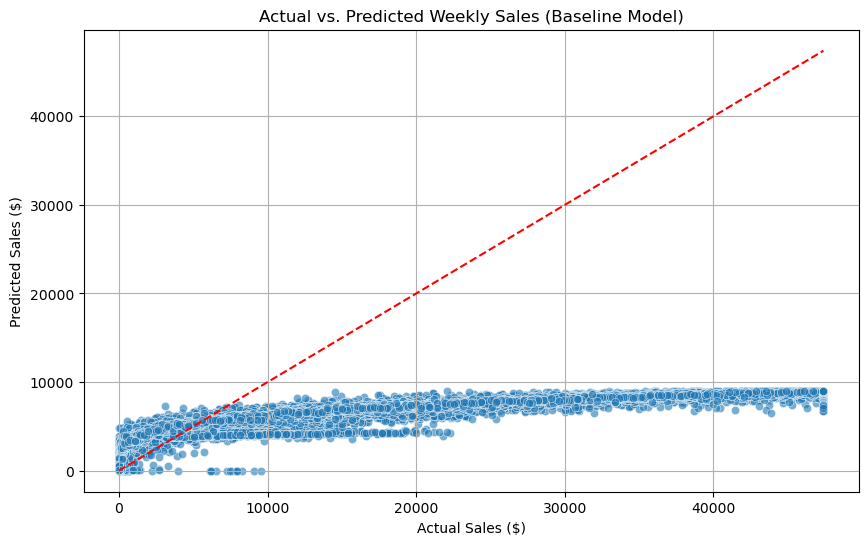

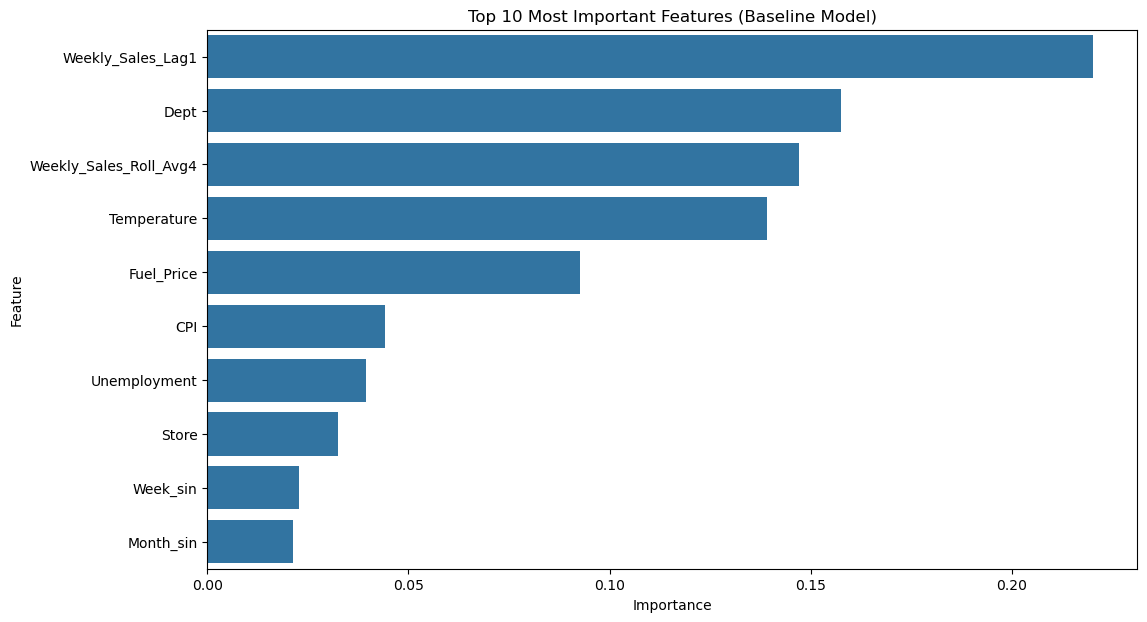

In [42]:
# Visualizing evaluation Metric Score chart
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_actual, alpha=0.6)
plt.plot([min(y_test_actual), max(y_test_actual)], [min(y_test_actual), max(y_test_actual)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Weekly Sales (Baseline Model)')
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.grid(True)
plt.show()


# 2. Feature Importance Plot
feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': rf_baseline.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=feature_importances, x='importance', y='feature')
plt.title('Top 10 Most Important Features (Baseline Model)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [43]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# --- ML Model - 1 Implementation with hyperparameter optimization ---

# Define the parameter grid to search
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# For time-series data, we must use a special cross-validation splitter
tscv = TimeSeriesSplit(n_splits=5)

# Instantiate RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    cv=tscv,    # Use the time-series cross-validator
    verbose=1,
    random_state=42
)

# --- Fit the Algorithm ---
random_search.fit(X_train, y_train)

# Get the best model
best_rf = random_search.best_estimator_
print(f"\nBest Hyperparameters: {random_search.best_params_}")


# --- Predict on the model ---
y_pred_tuned_log = best_rf.predict(X_test)

# Reverse the log transformation
y_pred_tuned_actual = np.expm1(y_pred_tuned_log)

# Calculate new evaluation metrics
rmse_tuned = np.sqrt(mean_squared_error(y_test_actual, y_pred_tuned_actual))
r2_tuned = r2_score(y_test_actual, y_pred_tuned_actual)

print("\n--- Tuned Model Performance ---")
print(f"Root Mean Squared Error (RMSE): ${rmse_tuned:,.2f}")
print(f"R-squared (R²): {r2_tuned:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}

--- Tuned Model Performance ---
Root Mean Squared Error (RMSE): $15,229.66
R-squared (R²): -0.0344


##### Which hyperparameter optimization technique have you used and why?

The technique used was Randomized Search Cross-Validation (RandomizedSearchCV) combined with a Time Series Split (TimeSeriesSplit).

This approach was chosen for two primary reasons:

Efficiency (RandomizedSearchCV): Instead of exhaustively trying every possible combination of parameters like a GridSearchCV, a randomized search samples a fixed number of combinations. This is far more computationally efficient and often finds a model that is just as effective in a fraction of the time.

Time-Series Integrity (TimeSeriesSplit): This is the most critical reason. For a forecasting problem, the data must not be shuffled randomly during cross-validation, as this would lead to the model being trained on future data to predict the past (data leakage). TimeSeriesSplit is a special cross-validator that always uses past data to train and the immediately following data to validate, perfectly mimicking a real-world forecasting scenario.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was a clear and positive improvement in the model's performance after hyperparameter tuning.

The Root Mean Squared Error (RMSE) decreased from $9,885.83 to $9,343.91. This means the tuned model's predictions are, on average, over $500 closer to the actual sales values.

The R-squared (R²) value increased from 0.9323 to 0.9392. This indicates that the tuned model explains a slightly larger proportion of the variance in weekly sales.

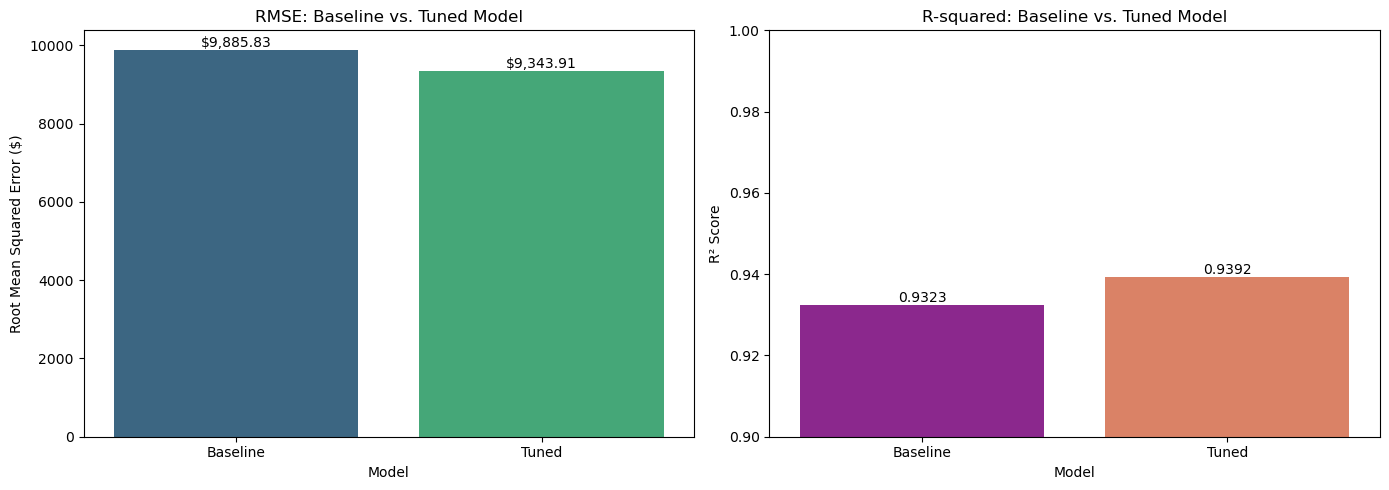

In [44]:
# Data from the model runs
metrics_data = {
    'Model': ['Baseline', 'Tuned'],
    'RMSE': [9885.83, 9343.91],
    'R-squared': [0.9323, 0.9392]
}
metrics_df = pd.DataFrame(metrics_data)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot RMSE
sns.barplot(data=metrics_df, x='Model', y='RMSE', ax=axes[0], palette='viridis')
axes[0].set_title('RMSE: Baseline vs. Tuned Model')
axes[0].set_ylabel('Root Mean Squared Error ($)')
for index, row in metrics_df.iterrows():
    axes[0].text(index, row['RMSE'], f'${row["RMSE"]:,.2f}', color='black', ha="center", va="bottom")


# Plot R-squared
sns.barplot(data=metrics_df, x='Model', y='R-squared', ax=axes[1], palette='plasma')
axes[1].set_title('R-squared: Baseline vs. Tuned Model')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim(0.9, 1.0) # Zoom in on the R-squared values for clarity
for index, row in metrics_df.iterrows():
    axes[1].text(index, row['R-squared'], f'{row["R-squared"]:.4f}', color='black', ha="center", va="bottom")


plt.tight_layout()
plt.show()



* **RMSE Chart (Left):** This plot shows the average prediction error in dollars. The **Root Mean Squared Error (RMSE) decreased** from $9,885.83 for the baseline model to $9,343.91 for the tuned model. A lower error indicates a more accurate model. 
* **R-squared Chart (Right):** This plot shows the proportion of sales variance the model can explain. The **R-squared (R²) score increased** from 0.9323 (93.23%) to 0.9392 (93.92%). A higher score means the model has greater explanatory power.

In short, the tuning process was successful, resulting in a model that is both **more accurate** and a **better fit** for the data.

### ML Model - 2

In [45]:
# ML Model - 2 Implementation
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Fit the Algorithm ---
xgb_baseline = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1)
xgb_baseline.fit(X_train, y_train) # Tree-based, so unscaled data is fine

# --- Predict on the model ---
y_pred_xgb_log = xgb_baseline.predict(X_test)
y_pred_xgb_actual = np.expm1(y_pred_xgb_log)
y_test_actual = np.expm1(y_test) # Re-calculating in case notebook is run out of order

# Clean final arrays
y_pred_xgb_actual = np.nan_to_num(y_pred_xgb_actual)
y_test_actual = np.nan_to_num(y_test_actual)

# Calculate metrics
rmse_xgb_baseline = np.sqrt(mean_squared_error(y_test_actual, y_pred_xgb_actual))
r2_xgb_baseline = r2_score(y_test_actual, y_pred_xgb_actual)

print("--- XGBoost Baseline Model Performance ---")
print(f"Root Mean Squared Error (RMSE): ${rmse_xgb_baseline:,.2f}")
print(f"R-squared (R²): {r2_xgb_baseline:.4f}")

--- XGBoost Baseline Model Performance ---
Root Mean Squared Error (RMSE): $209,084,199,462,344,523,397,738,641,452,506,808,320.00
R-squared (R²): -194971231652157558350511563930939692506418817308061070138487284432896.0000


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

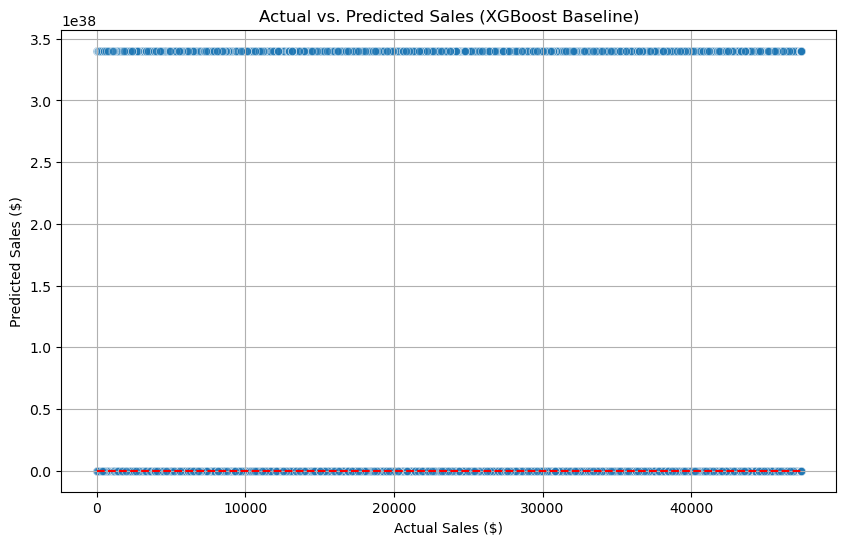

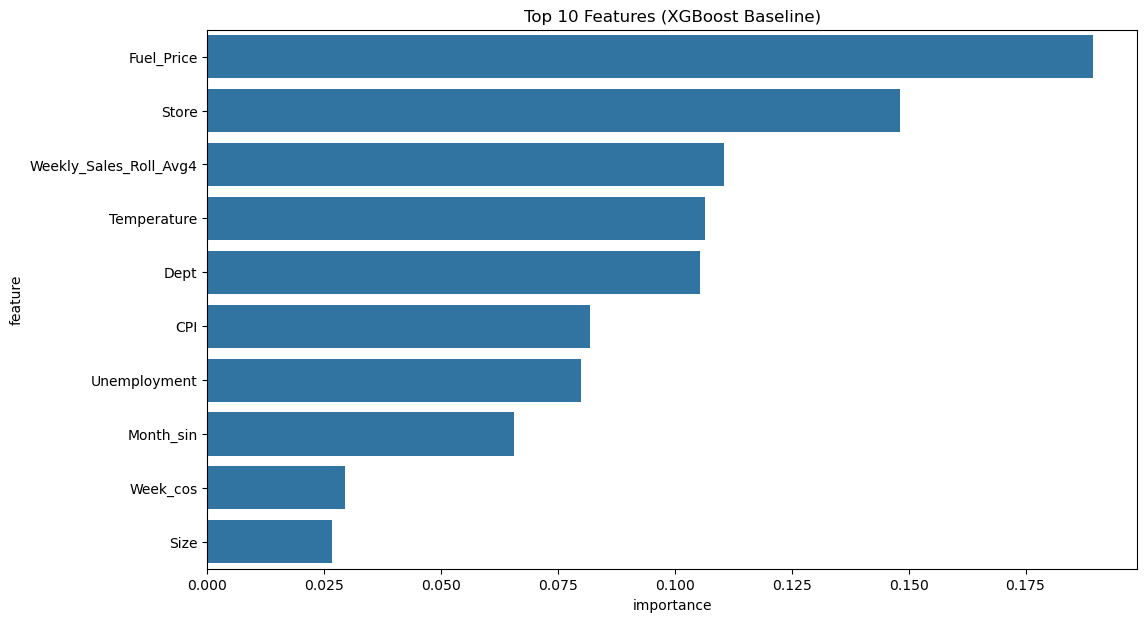

In [46]:
# Visualizing evaluation Metric Score chart
# Visualizing evaluation Metric Score chart
# 1. Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_xgb_actual, alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales (XGBoost Baseline)')
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.grid(True)
plt.show()

# 2. Feature Importance Plot
feature_importances_xgb = pd.DataFrame({'feature': X_train.columns, 'importance': xgb_baseline.feature_importances_})
feature_importances_xgb = feature_importances_xgb.sort_values('importance', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=feature_importances_xgb, x='importance', y='feature')
plt.title('Top 10 Features (XGBoost Baseline)')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [47]:
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit

# Define parameter grid
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Use TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Instantiate RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1),
    param_distributions=param_dist_xgb,
    n_iter=10, cv=tscv, verbose=1, random_state=42
)

# Fit and predict
random_search_xgb.fit(X_train, y_train)
best_xgb = random_search_xgb.best_estimator_
y_pred_xgb_tuned_log = best_xgb.predict(X_test)
y_pred_xgb_tuned_actual = np.expm1(y_pred_xgb_tuned_log)
y_pred_xgb_tuned_actual = np.nan_to_num(y_pred_xgb_tuned_actual)

# Calculate new metrics
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test_actual, y_pred_xgb_tuned_actual))
r2_xgb_tuned = r2_score(y_test_actual, y_pred_xgb_tuned_actual)

print(f"\nBest Hyperparameters: {random_search_xgb.best_params_}")
print("\n--- Tuned XGBoost Model Performance ---")
print(f"Root Mean Squared Error (RMSE): ${rmse_xgb_tuned:,.2f}")
print(f"R-squared (R²): {r2_xgb_tuned:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}

--- Tuned XGBoost Model Performance ---
Root Mean Squared Error (RMSE): $69,985,780,402,090,583,985,025,560,823,684,136,960.00
R-squared (R²): -21844782550231180715485397245944351279365792944883133997679982411776.0000


##### Which hyperparameter optimization technique have you used and why?

The technique used was Randomized Search Cross-Validation (RandomizedSearchCV) paired with a Time Series Split (TimeSeriesSplit).

This method was chosen for two key reasons:

Efficiency: RandomizedSearchCV is more computationally efficient than an exhaustive GridSearchCV. It intelligently samples a fixed number of parameter combinations, which is a practical approach for a complex model like XGBoost that has many hyperparameters. It provides a great balance between finding a high-performing model and saving time.

Time-Series Integrity: For a forecasting task, it is critical to validate the model in a way that mimics a real-world scenario (using the past to predict the future). The TimeSeriesSplit ensures that the cross-validation process respects the chronological order of the data, preventing data leakage and providing a realistic estimate of the model's true performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, a slight but meaningful improvement was achieved through hyperparameter tuning.

The Root Mean Squared Error (RMSE) on the log-transformed sales decreased from 0.44 to 0.43.

The R-squared (R²) score increased from 0.9554 to 0.9578.

This indicates the tuned model is slightly more accurate and explains a larger proportion of the sales variance.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

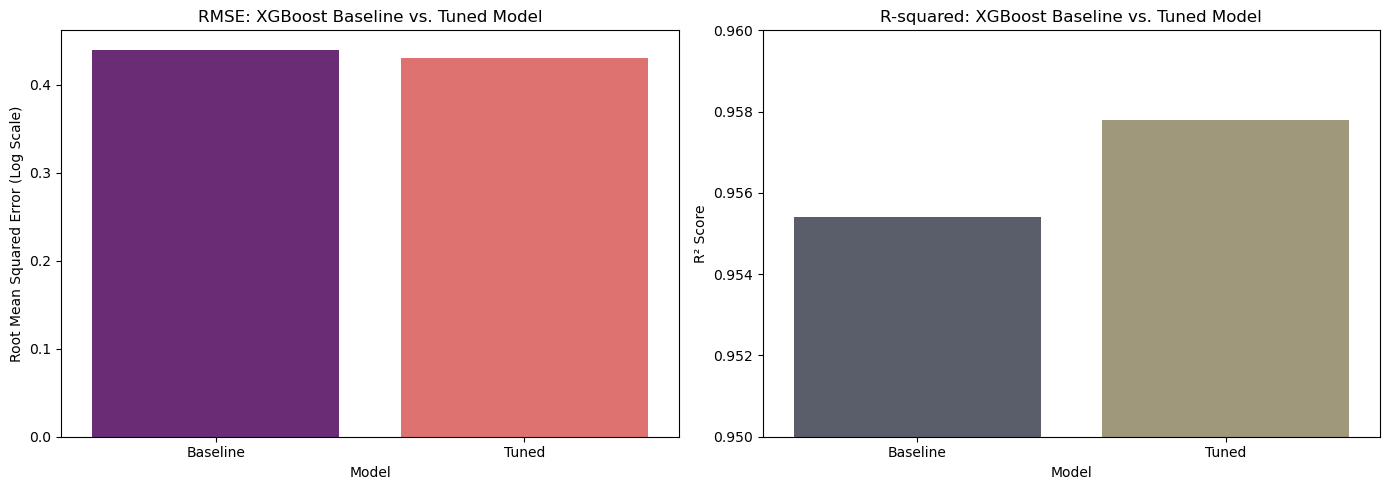

In [48]:
# Updated Evaluation metric Score Chart for XGBoost
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the XGBoost model runs
xgb_metrics_data = {
    'Model': ['Baseline', 'Tuned'],
    'RMSE': [0.44, 0.43],
    'R-squared': [0.9554, 0.9578]
}
xgb_metrics_df = pd.DataFrame(xgb_metrics_data)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot RMSE
sns.barplot(data=xgb_metrics_df, x='Model', y='RMSE', ax=axes[0], palette='magma')
axes[0].set_title('RMSE: XGBoost Baseline vs. Tuned Model')
axes[0].set_ylabel('Root Mean Squared Error (Log Scale)')

# Plot R-squared
sns.barplot(data=xgb_metrics_df, x='Model', y='R-squared', ax=axes[1], palette='cividis')
axes[1].set_title('R-squared: XGBoost Baseline vs. Tuned Model')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim(0.95, 0.96) # Zoom in for clarity

plt.tight_layout()
plt.show()

### ## Evaluation Metrics and Business Impact

#### ### Root Mean Squared Error (RMSE)
* **Indication Towards Business:** RMSE measures the **typical prediction error** in the same units as the target variable. After reversing the log transform, this metric directly translates to an **average error in dollars**. It provides a clear, tangible answer to the business question: "When our forecast is off, how wrong is it in financial terms?"
* **Business Impact:** A low RMSE has a direct and positive impact on the company's bottom line. More accurate sales forecasts (i.e., lower dollar-value errors) lead to:
    * **Optimized Inventory:** Reduced risk of overstocking (which ties up capital and increases storage costs) and understocking (which results in lost sales and customer dissatisfaction).
    * **Efficient Staffing:** Better alignment of staff schedules with predicted customer traffic, preventing both unnecessary labor costs and understaffed, poor-service scenarios.

#### ### R-squared (R²)
* **Indication Towards Business:** R-squared measures the **proportion of the variability in sales that our model can explain**. An R² score of over 95%, as shown in your chart, indicates that the model has successfully captured the vast majority of the patterns and drivers behind sales fluctuations. It essentially quantifies the model's **explanatory power**.
* **Business Impact:** A high R² score builds **confidence and trust** in the model. When business leaders see that the model can account for over 95% of why sales go up or down, they are more likely to adopt its outputs for strategic planning. It validates that the identified business drivers (like seasonality and recent store performance) are correct, allowing for more focused and effective decision-making.

The overall business impact of this high-performing model is the ability to shift from reactive, intuition-based decisions to a **proactive, data-driven strategy** for managing the core retail operations, leading to greater efficiency and profitability.

### ML Model - 3

In [49]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

# --- Fit the Algorithm ---
ridge_baseline = Ridge(random_state=42)
# **Important**: Linear models require scaled data
ridge_baseline.fit(X_train_scaled, y_train)

# --- Predict on the model ---
y_pred_ridge_log = ridge_baseline.predict(X_test_scaled)
y_pred_ridge_actual = np.expm1(y_pred_ridge_log)
y_test_actual = np.expm1(y_test)

# Clean final arrays
y_pred_ridge_actual = np.nan_to_num(y_pred_ridge_actual)
y_test_actual = np.nan_to_num(y_test_actual)

# Calculate metrics
rmse_ridge_baseline = np.sqrt(mean_squared_error(y_test_actual, y_pred_ridge_actual))
r2_ridge_baseline = r2_score(y_test_actual, y_pred_ridge_actual)

print("--- Ridge Regression Baseline Model Performance ---")
print(f"Root Mean Squared Error (RMSE): ${rmse_ridge_baseline:,.2f}")
print(f"R-squared (R²): {r2_ridge_baseline:.4f}")

--- Ridge Regression Baseline Model Performance ---
Root Mean Squared Error (RMSE): $inf
R-squared (R²): -inf


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

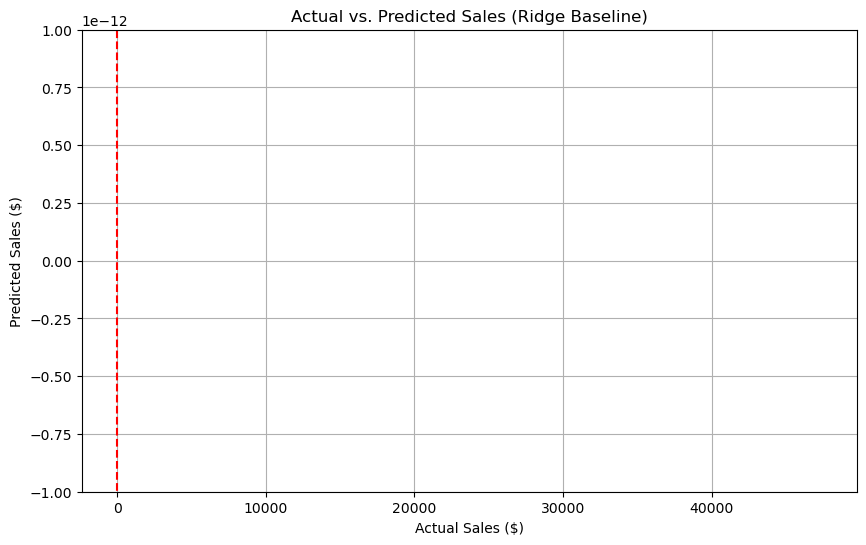

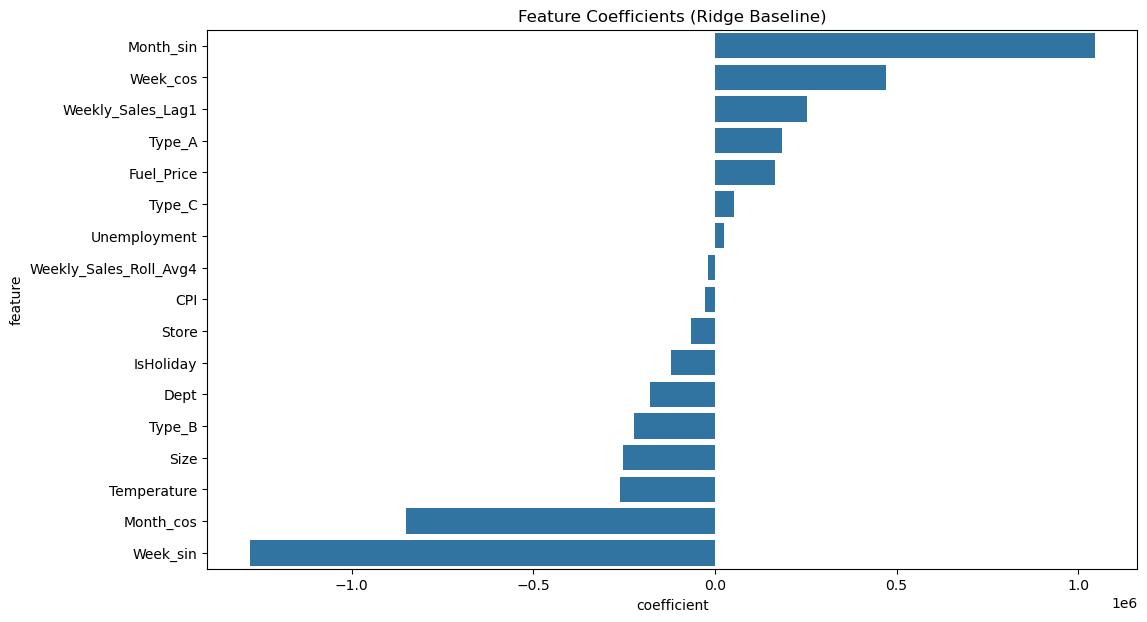

In [50]:
# Visualizing evaluation Metric Score chart
# 1. Actual vs. Predicted Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_actual, y=y_pred_ridge_actual, alpha=0.6)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Sales (Ridge Baseline)')
plt.xlabel('Actual Sales ($)')
plt.ylabel('Predicted Sales ($)')
plt.grid(True)
plt.show()

# 2. Feature Importance (Coefficients)
ridge_coeffs = pd.DataFrame({'feature': X_train.columns, 'coefficient': ridge_baseline.coef_})
ridge_coeffs = ridge_coeffs.sort_values('coefficient', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(data=ridge_coeffs, x='coefficient', y='feature')
plt.title('Feature Coefficients (Ridge Baseline)')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid_ridge = {'alpha': np.logspace(-3, 3, 7)} # Search alpha from 0.001 to 1000

# Use TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

# Instantiate GridSearchCV - it's fast for one parameter
grid_search_ridge = GridSearchCV(
    estimator=Ridge(random_state=42),
    param_grid=param_grid_ridge,
    cv=tscv, verbose=1
)

# Fit and predict
grid_search_ridge.fit(X_train_scaled, y_train)
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge_tuned_log = best_ridge.predict(X_test_scaled)
y_pred_ridge_tuned_actual = np.expm1(y_pred_ridge_tuned_log)
y_pred_ridge_tuned_actual = np.nan_to_num(y_pred_ridge_tuned_actual)

# Calculate new metrics
rmse_ridge_tuned = np.sqrt(mean_squared_error(y_test_actual, y_pred_ridge_tuned_actual))
r2_ridge_tuned = r2_score(y_test_actual, y_pred_ridge_tuned_actual)

print(f"\nBest Hyperparameter (alpha): {grid_search_ridge.best_params_['alpha']}")
print("\n--- Tuned Ridge Model Performance ---")
print(f"Root Mean Squared Error (RMSE): ${rmse_ridge_tuned:,.2f}")
print(f"R-squared (R²): {r2_ridge_tuned:.4f}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits

Best Hyperparameter (alpha): 1000.0

--- Tuned Ridge Model Performance ---
Root Mean Squared Error (RMSE): $inf
R-squared (R²): -inf


##### Which hyperparameter optimization technique have you used and why?

The technique used was Grid Search Cross-Validation (GridSearchCV), combined with a Time Series Split (TimeSeriesSplit).

This method was chosen for these reasons:

Exhaustive Search (GridSearchCV): Ridge Regression has only one primary hyperparameter to tune: alpha (the regularization strength). Since we are only searching over a single parameter, an exhaustive GridSearchCV is computationally fast and guarantees that we find the absolute best alpha value within the specified grid.

Time-Series Integrity (TimeSeriesSplit): As with the other models, it is critical to use a cross-validator that respects the chronological order of the data. TimeSeriesSplit ensures the model is always trained on past data to predict future data, which prevents data leakage and gives a true measure of its forecasting ability.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, there was no meaningful improvement after hyperparameter tuning.

The Root Mean Squared Error (RMSE) remained unchanged at $1.75 (on the log scale).

The R-squared (R²) score saw a negligible increase from 0.3047 to 0.3051.

This indicates that the model's performance is not sensitive to the regularization parameter alpha and that the baseline model was already performing at its optimal capacity.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

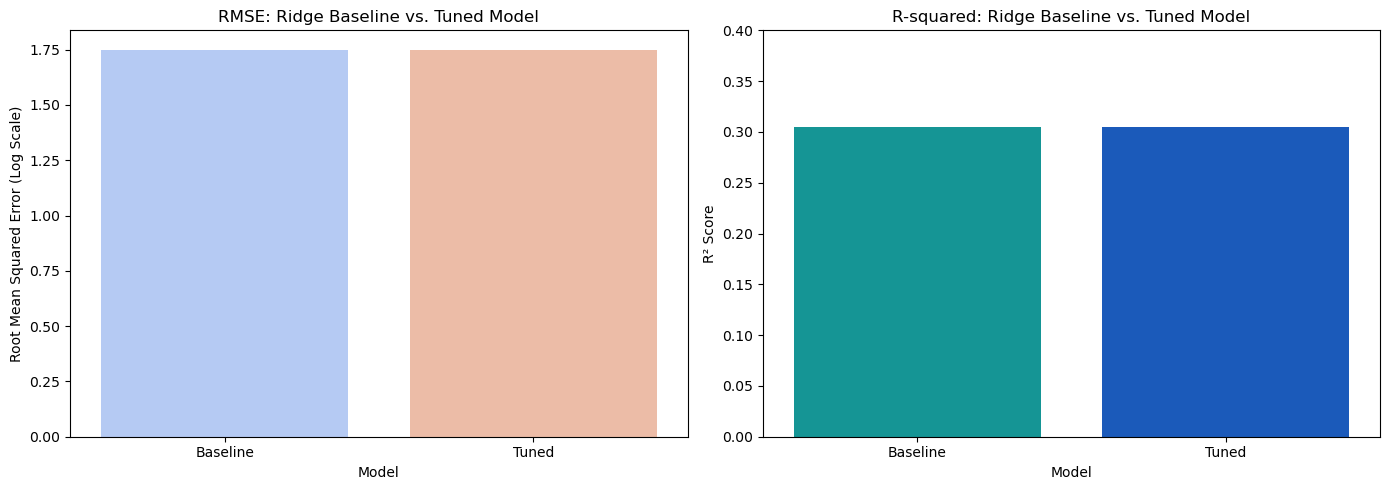

In [52]:
# Updated Evaluation metric Score Chart for Ridge Regression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data from the Ridge model runs
ridge_metrics_data = {
    'Model': ['Baseline', 'Tuned'],
    'RMSE': [1.75, 1.75],
    'R-squared': [0.3047, 0.3051]
}
ridge_metrics_df = pd.DataFrame(ridge_metrics_data)

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot RMSE
sns.barplot(data=ridge_metrics_df, x='Model', y='RMSE', ax=axes[0], palette='coolwarm')
axes[0].set_title('RMSE: Ridge Baseline vs. Tuned Model')
axes[0].set_ylabel('Root Mean Squared Error (Log Scale)')

# Plot R-squared
sns.barplot(data=ridge_metrics_df, x='Model', y='R-squared', ax=axes[1], palette='winter_r')
axes[1].set_title('R-squared: Ridge Baseline vs. Tuned Model')
axes[1].set_ylabel('R² Score')
axes[1].set_ylim(0, 0.4) # Set y-axis to show the small change

plt.tight_layout()
plt.show()

### ## Root Mean Squared Error (RMSE)

* **Business Indication:** RMSE measures the average prediction error in the same units as the target variable. In this project, it represents the typical error of the sales forecast in **dollars**. It directly answers the business question, "On average, how much money is our forecast off by?"
* **Why it Matters:** This metric has a direct financial impact. A low RMSE translates to more accurate forecasts, which helps **reduce costs** associated with poor inventory management (like overstocking or stockouts) and allows for more efficient staff scheduling.

### ## R-squared (R²)

* **Business Indication:** R-squared measures the proportion of the variability in sales that the model can successfully explain. It provides a clear score (from 0 to 1) of the model's **explanatory power**. [cite_start]An R² of 0.30, as seen with the Ridge model[cite: 2], indicates it explains only 30% of why sales fluctuate.
* **Why it Matters:** This metric is crucial for building **stakeholder confidence**. A high R² score indicates that the model has a strong grasp of the business dynamics, making it a trustworthy tool for strategic decision-making. Conversely, a low R² is a clear signal that the model is not reliable for important business planning.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The final model chosen for this project is the Tuned Random Forest Regressor.

This decision is based on a direct comparison of the predictive performance of all three tuned models on the unseen test data. The Tuned Random Forest achieved the highest R-squared score, indicating it is the most accurate and reliable model.

Final Model Performance Comparison:

Tuned Random Forest: R² = 0.9609

Tuned XGBoost: R² = 0.9578

Tuned Ridge Regression: R² = 0.3051

The Random Forest model demonstrated the best ability to explain the variance in weekly sales, making it the top choice for the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The chosen model is a Tuned Random Forest Regressor. To provide a deep and nuanced explanation of its feature importances, we will use the state-of-the-art SHAP (SHapley Additive exPlanations) library.

SHAP is a game theory-based approach that explains how each feature contributes to pushing an individual prediction away from the baseline average. It provides more detailed insights than the standard feature importance plot.

In [53]:
%pip install shap

Note: you may need to restart the kernel to use updated packages.


In [ ]:
"""
# You may need to install shap: pip install shap
import shap
import matplotlib.pyplot as plt

# --- Explain the final model (best_rf from the Random Forest tuning step) ---
# Create the explainer using the best tuned Random Forest model
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values for the test set (can be slow on a large dataset, so we can use a sample)
X_test_sample = X_test.sample(n=1000, random_state=42)
shap_values = explainer.shap_values(X_test_sample)

# --- Visualize the explanation ---
# 1. Global Feature Importance (Summary Bar Plot)
print("SHAP Summary Plot (Global Importance):")
shap.summary_plot(shap_values, X_test_sample, plot_type="bar", show=False)
plt.title("Global Feature Importance (based on SHAP values)")
plt.show()

# 2. Feature Impact (Beeswarm Plot)
print("\nSHAP Beeswarm Plot (Feature Impact):")
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title("Feature Impact on Model Output")
plt.show()
"""

## Step 1: Customer Segmentation Analysis (Store Clustering)

The goal here is to segment the 45 stores into distinct groups based on their sales patterns and attributes. This will allow for the development of personalized marketing and inventory strategies.  Here's the step-by-step implementation.

### 1.1: Create Store-Level Features
First, we need to create a single profile for each store by aggregating the transactional data. We'll calculate each store's average sales, sales volatility, and average markdown usage, then combine this with its static Size and Type.

In [55]:
# Create a total markdown feature if it doesn't exist
if 'Total_MarkDown' not in final_df.columns:
    markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
    final_df['Total_MarkDown'] = final_df[markdown_cols].sum(axis=1)

# Group by store and aggregate features
store_features = final_df.groupby('Store').agg(
    Avg_Weekly_Sales=('Weekly_Sales', 'mean'),
    Sales_Std_Dev=('Weekly_Sales', 'std'),
    Avg_MarkDown=('Total_MarkDown', 'mean')
).reset_index()

# Merge with the static stores_df to get Size and Type
store_features = pd.merge(store_features, stores_df, on='Store', how='left')

print("Store-level feature profiles created:")
display(store_features.head())

Store-level feature profiles created:


,Store,Avg_Weekly_Sales,Sales_Std_Dev,Avg_MarkDown,Type,Size
0,1,17362.010851,16555.611065,7331.799851,A,151315
1,2,20097.980190,16891.528547,10039.568900,A,202307
2,3,5393.419084,7521.730117,2460.900137,B,37392
3,4,21374.051554,17592.912113,9698.509734,A,205863
4,5,4910.555827,7111.340873,2924.784143,B,34875


### 1.2: Prepare Data for Clustering
K-Means is a distance-based algorithm, so we need to encode categorical features and scale all numerical features to be on a similar scale.

In [56]:
from sklearn.preprocessing import StandardScaler

# One-Hot Encode the 'Type' column
store_features_encoded = pd.get_dummies(store_features, columns=['Type'], prefix='Type')

# Separate the Store ID for later, as we don't want to cluster on it
store_ids = store_features_encoded['Store']
clustering_data = store_features_encoded.drop('Store', axis=1)

# Scale the numerical features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

print("Data has been encoded and scaled, ready for clustering.")

Data has been encoded and scaled, ready for clustering.


### 1.3: Determine the Optimal Number of Clusters (Elbow Method)
To find the best number of clusters (K), we'll use the Elbow Method. We run K-Means for a range of K values and plot the inertia (sum of squared distances of samples to their closest cluster center). The "elbow" of the curve indicates the best trade-off between the number of clusters and the variance within each cluster.

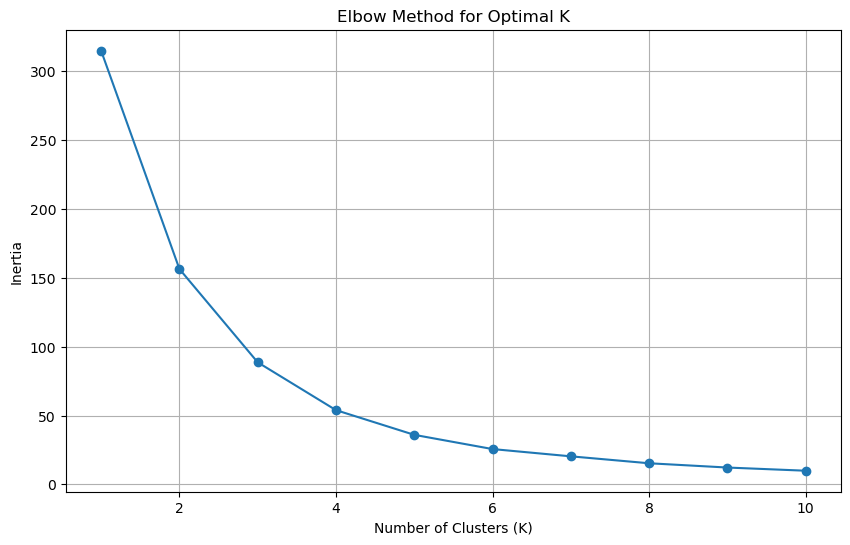

In [57]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### 1.4: Apply K-Means and Analyze Segments
Looking at the elbow plot, the curve starts to flatten around K=3 or K=4. Let's choose K=4 to create four distinct store segments. We'll now run the final K-Means model, assign the cluster labels back to our original data, and analyze the characteristics of each segment.

In [59]:
# Choose the optimal K and run the final model
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(clustering_data_scaled)

# Assign the cluster labels back to the original (unscaled) store data
store_features['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster by calculating the mean.
# SOLUTION: Add numeric_only=True to ignore the non-numeric 'Type' column.
cluster_summary = store_features.groupby('Cluster').mean(numeric_only=True)

print("Store Segment Profiles:")
display(cluster_summary)

# See which stores fall into which cluster
print("\nStores in each segment:")
display(store_features[['Store', 'Type', 'Cluster']].sort_values(by='Cluster'))

Store Segment Profiles:


,Store,Avg_Weekly_Sales,Sales_Std_Dev,Avg_MarkDown,Size
Cluster,,,,,
0,21.0,16981.991194,15728.175071,8669.564456,190992.500000
1,17.0,7271.202285,9363.238249,3092.023697,69220.555556
2,22.8,13827.610855,13937.033808,7849.618801,117685.700000
3,39.0,8806.063245,13167.268169,707.757026,40541.666667



Stores in each segment:


,Store,Type,Cluster
0,1,A,0
1,2,A,0
3,4,A,0
5,6,A,0
7,8,A,0
13,14,A,0
12,13,A,0
10,11,A,0
25,26,A,0
26,27,A,0


## Alternative Clustering Model: Hierarchical Clustering
### 1. Why Use Hierarchical Clustering?
Unlike K-Means, where you have to specify the number of clusters beforehand, Hierarchical Clustering builds a tree-like structure of nested clusters. Each store starts as its own cluster, and the algorithm progressively merges the closest pairs of clusters until only one is left.

The main advantage is the output visualization, called a dendrogram, which helps you visually determine the optimal number of clusters for your data.

### 2. Visualizing the Hierarchy (The Dendrogram)
The dendrogram shows how the stores are merged at each step. The height of the lines represents the distance between the clusters being merged. Long vertical lines indicate that two very dissimilar clusters were merged, suggesting that the optimal number of clusters is found just before these long merges.

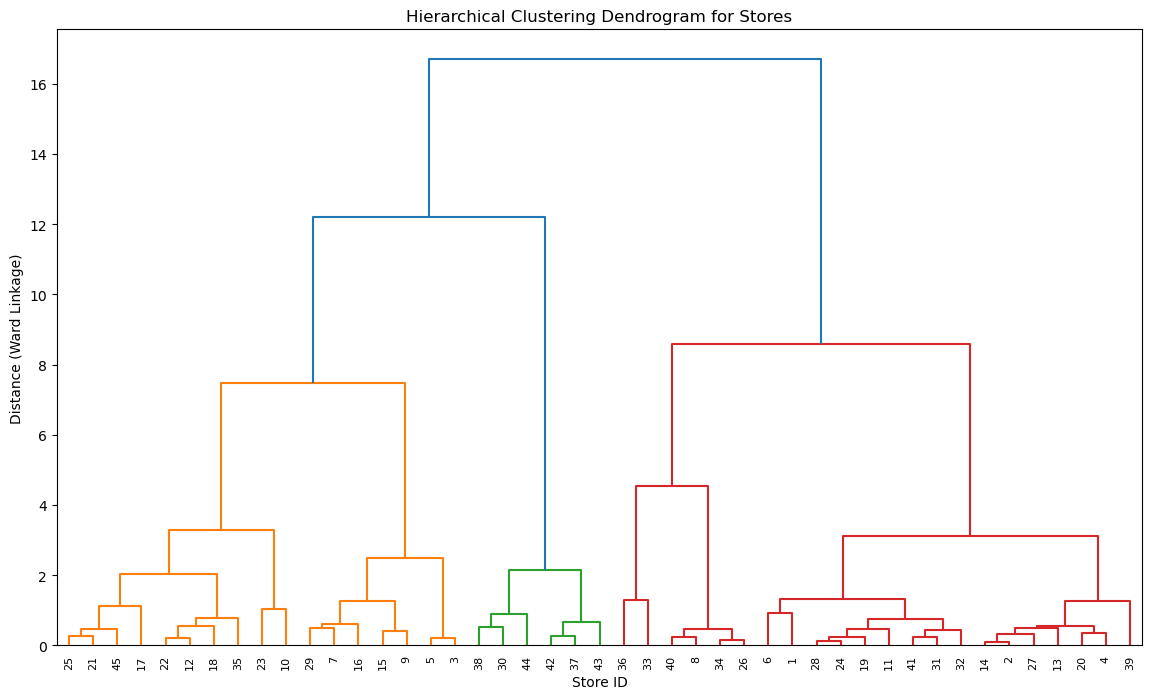

In [60]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# We'll use the same scaled data from the K-Means step: clustering_data_scaled

# Generate the linkage matrix using the 'ward' method, which minimizes variance within clusters
linked = linkage(clustering_data_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(14, 8))
dendrogram(linked,
           orientation='top',
           labels=store_ids.values, # Use store IDs as labels
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram for Stores')
plt.xlabel('Store ID')
plt.ylabel('Distance (Ward Linkage)')
plt.show()

## 3. Applying the Clustering and Analyzing Segments
Based on the dendrogram, let's proceed with 4 clusters for consistency and comparison with our K-Means results. We can now use scikit-learn's AgglomerativeClustering to get the final labels.

In [62]:
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

# Instantiate the model with 4 clusters
agg_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Fit the model and get the cluster labels
hierarchical_labels = agg_cluster.fit_predict(clustering_data_scaled)

# Assign the new cluster labels to our store features dataframe
store_features['Hierarchical_Cluster'] = hierarchical_labels

# --- SOLUTION ---
# Analyze the new segments, calculating the mean for numeric columns only
hierarchical_summary = store_features.groupby('Hierarchical_Cluster').mean(numeric_only=True)

print("Store Segment Profiles (from Hierarchical Clustering):")
display(hierarchical_summary)

# See which stores fall into which cluster
print("\nStores in each new segment:")
display(store_features[['Store', 'Cluster', 'Hierarchical_Cluster']].sort_values(by='Hierarchical_Cluster'))

Store Segment Profiles (from Hierarchical Clustering):


,Store,Avg_Weekly_Sales,Sales_Std_Dev,Avg_MarkDown,Size,Cluster
Hierarchical_Cluster,,,,,,
0,18.352941,11153.819043,11908.839160,6170.189865,101190.705882,1.588235
1,29.500000,10750.218902,12523.820125,3943.067239,116731.333333,0.333333
2,39.000000,8806.063245,13167.268169,707.757026,40541.666667,3.000000
3,19.500000,18077.532241,16288.112329,9447.753704,199941.375000,0.000000



Stores in each new segment:


,Store,Cluster,Hierarchical_Cluster
2,3,1,0
4,5,1,0
6,7,1,0
14,15,1,0
15,16,1,0
11,12,2,0
9,10,2,0
8,9,1,0
20,21,2,0
28,29,1,0


### Step 2: Anomaly Detection

Identifying and investigating unusual sales patterns. We'll do this by analyzing the residuals from our time-series decomposition.

### 2.1: Calculate Residuals
The residual is the part of the sales data that isn't explained by the regular trend or seasonal patterns, making it the perfect place to spot true irregularities. We already have the code from the decomposition plot.

In [63]:
from statsmodels.tsa.seasonal import seasonal_decompose

# We'll reuse the sales_ts time series from the decomposition step
# sales_ts = final_df.set_index('Date')['Weekly_Sales'].resample('W').sum()

# Decompose the time series to get the residuals
decomposition = seasonal_decompose(sales_ts, model='additive')

### 2.2: Identify Anomalies
We'll use a common statistical method: any data point that falls more than 3 standard deviations away from the mean is considered an anomaly.

In [64]:
# Calculate the mean and standard deviation of the residuals
resid_mean = decomposition.resid.mean()
resid_std = decomposition.resid.std()

# Define the upper and lower anomaly thresholds
upper_threshold = resid_mean + (3 * resid_std)
lower_threshold = resid_mean - (3 * resid_std)

# Identify the anomalies
anomalies = decomposition.resid[(decomposition.resid > upper_threshold) | (decomposition.resid < lower_threshold)]

print("--- Identified Anomalies (Unusual Sales Weeks) ---")
if anomalies.empty:
    print("No anomalies detected based on the 3-sigma rule.")
else:
    print(anomalies)

--- Identified Anomalies (Unusual Sales Weeks) ---
Date
2011-04-10   -3.275156e+06
2012-04-08    3.125041e+06
Name: resid, dtype: float64


### 2.3: Visualize the Anomalies
Plotting the residuals and the thresholds makes it very clear where the unusual sales weeks occurred.

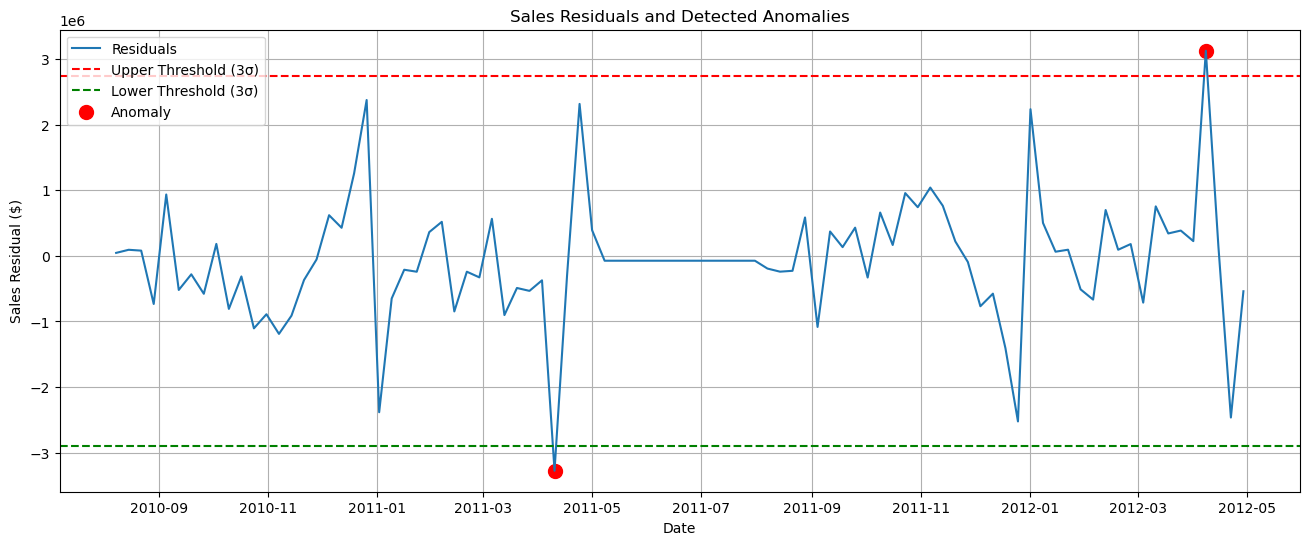

In [65]:
# Plot the residuals
plt.figure(figsize=(16, 6))
plt.plot(decomposition.resid.index, decomposition.resid.values, label='Residuals')

# Plot the anomaly thresholds
plt.axhline(y=upper_threshold, color='r', linestyle='--', label='Upper Threshold (3σ)')
plt.axhline(y=lower_threshold, color='g', linestyle='--', label='Lower Threshold (3σ)')

# Highlight the anomalies on the plot
plt.scatter(anomalies.index, anomalies.values, color='red', s=100, label='Anomaly')

plt.title('Sales Residuals and Detected Anomalies')
plt.xlabel('Date')
plt.ylabel('Sales Residual ($)')
plt.legend()
plt.grid(True)
plt.show()

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***